## Preparation& Clean Data

#### 1. Import relevant libraries

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
import numpy as np

#### Preparation & Clean Data

In [116]:
df = pd.read_csv('/content/drive/MyDrive/Final Project/Kaggle Machine Learning Survey/kaggle_survey_2021_responses.csv', low_memory=False)
df.head()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN


##### Reshaping dataframes

In [117]:
df.columns = df.iloc[0].values
df = df.iloc[1:]
df.head()

,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education that you have attained or plan to attain within the next 2 years?,Select the title most similar to your current role (or most recent title if retired): - Selected Choice,For how many years have you been writing code and/or programming?,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - R,What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Comet.ml","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Sacred + Omniboard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other"
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
5,781,45-49,Man,India,Doctoral degree,Other,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df = df.rename(columns={'What is your age (# years)?':'Age','In which country do you currently reside?':'Country','Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'Role','What is your gender? - Selected Choice':'Gender','What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'Degree','For how many years have you been writing code and/or programming?':'Coding Experience','What is your current yearly compensation (approximate $USD)?':'Income','For how many years have you used machine learning methods?':'ML Experience'})

##### Correct labeled data for further analysis

In [119]:
Job_list = {'Program/Project Manager':'Manager','Product Manager':'Manager','Product/Project Manager':'Manager','Business Analyst':'Data Analyst'}
df['Role'] = df['Role'].replace(Job_list)

In [120]:
money_spent_mapping = {'$1000-$9,999': 5000,'$0 ($USD)': 0,'$1-$99': 50,'$100-$999': 500,'$10,000-$99,999': 50000,'$100,000 or more ($USD)': 100000}
df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'] = df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].replace(money_spent_mapping)

In [121]:
tpu_usage_mapping = {'Never': 0,'6-25 times': 15,'Once': 1,'2-5 times': 3.5,'More than 25 times': 25}
df['Approximately how many times have you used a TPU (tensor processing unit)?'] = df['Approximately how many times have you used a TPU (tensor processing unit)?'].replace(tpu_usage_mapping)

In [122]:
df['Anual Income'] = df['Income']

In [123]:
Income_mapping = {'100,000-124,999': 112000,'15,000-19,999': 17500,'125,000-149,999': 137000,'70,000-79,999': 75000,'30,000-39,999': 35000,'90,000-99,999': 95000,'1,000-1,999': 1500,'$0-999': 500,'10,000-14,999': 12500,'150,000-199,999': 175000,'60,000-69,999': 65000,'4,000-4,999': 4500,'> $500,000': 500000,'300,000-500,000': 400000,'40,000-49,999': 45000,'25,000-29,999': 27500,'80,000-89,999': 85000,'7,500-9,999': 8750,'50,000-59,999': 55000,'250,000-299,999': 275000,'5,000-7,499': 6250,'2,000-2,999': 2500,'20,000-24,999': 22500,'200,000-249,999': 225000,'3,000-3,999': 3500,'300,000-499,999': 400000,'>$1,000,000': 1000000,'$500,000-999,999': 750000}
df['Income'] = df['Income'].replace(Income_mapping)

In [124]:
df['ML Experience'] = df['ML Experience'].replace({'I do not use machine learning methods': 0, 'Under 1 year': 0.5, '1-2 years':1.5, '2-3 years':2.5, '3-4 years':3.5, '4-5 years':4.5, '5-10 years':7.5, '10-20 years':15, '20 or more years':20})

In [125]:
df['Coding Experience'] = df['Coding Experience'].replace({'I have never written code':0, '< 1 years':0.5, '1-2 years':1.5, '1-3 years':2, '3-5 years':4, '5-10 years':7.5, '10-20 years':15, '20+ years':20})

In [126]:
df['Age range'] = df['Age']

In [127]:
df['Age'] = df['Age'].replace({'18-21':19.5, '22-24':23.0, '25-29':27.0, '30-34':32.0, '35-39':37.0, '40-44':42.0, '45-49':47.0, '50-54':52.0, '55-59':57.0, '60-69':64.5, '70+':70})


In [128]:
df['Does your current employer incorporate machine learning methods into their business?'] = df['Does your current employer incorporate machine learning methods into their business?'].replace({'I do not know':'Not use','No (we do not use ML methods)':'Not use','We use ML methods for generating insights (but do not put working models into production)':'Exploring ML methods and generating insights','We are exploring ML methods (and may one day put a model into production)':'Exploring ML methods and generating insights','We recently started using ML methods (i.e., models in production for less than 2 years)':'Apply ML methods to production','We have well established ML methods (i.e., models in production for more than 2 years)':'Apply ML methods to production'})

In [129]:
df['Country'] = df['Country'].replace({'United States of America':'US', 'United Kingdom of Great Britain and Northern Ireland':'UK'})


In [130]:
replacement_list = [
    (r"What programming languages do you use on a regular basis\? \(Select all that apply\) - Selected Choice", "Programming languages"),
    (r"Which of the following integrated development environments \(IDE\'s\) do you use on a regular basis\?  \(Select all that apply\) - Selected Choice", "IDE's"),
    (r"Which of the following machine learning frameworks do you use on a regular basis\? \(Select all that apply\) - Selected Choice", "Machine Learning frameworks"),
    (r"Which of the following ML algorithms do you use on a regular basis\? \(Select all that apply\): - Selected Choice", "Machine Learning algorithms"),
    (r"Which categories of computer vision methods do you use on a regular basis\?  \(Select all that apply\) - Selected Choice", "Computer vision methods"),
    (r"Which of the following natural language processing \(NLP\) methods do you use on a regular basis\?  \(Select all that apply\) - Selected Choice", "NLP methods"),
    (r"On which platforms have you begun or completed data science courses\? \(Select all that apply\) - Selected Choice", "DS learning platforms"),
    (r"Who/what are your favorite media sources that report on data science topics\? \(Select all that apply\) - Selected Choice", "Media sources")
]

for old, new in replacement_list:
    df.columns = df.columns.str.replace(old, new, regex=True)

##### Remove outlier

We can see that Age,Income and Coding Experience can contain outliers based on the table described.
Let's check it out

In [131]:
df.describe()

,Age,Coding Experience,Approximately how many times have you used a TPU (tensor processing unit)?,ML Experience,Income,Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?
count,25973.000000,25973.000000,24403.000000,23754.000000,15391.000000,15183.000000
mean,31.260694,4.922997,1.819633,1.814642,44057.842245,11919.149707
std,11.341192,5.801440,4.788231,2.948018,88275.525953,27340.299601
min,19.500000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,23.000000,0.500000,0.000000,0.500000,1500.000000,0.000000
50%,27.000000,2.000000,0.000000,0.500000,12500.000000,50.000000
75%,37.000000,7.500000,1.000000,2.500000,55000.000000,5000.000000
max,70.000000,20.000000,25.000000,20.000000,1000000.000000,100000.000000


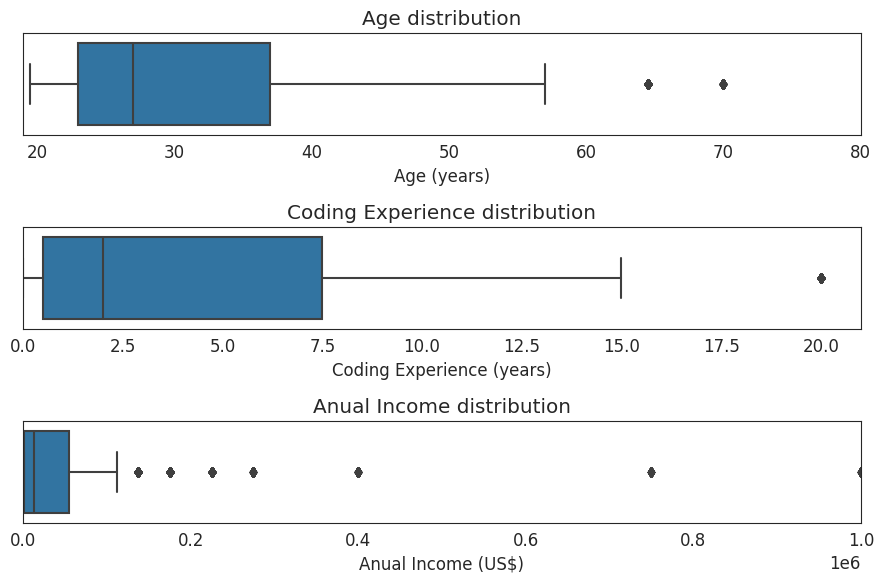

In [132]:
plt.figure(figsize=(9, 6))

# Age
plt.subplot(3, 1, 1)
sns.boxplot(data=df, x='Age')
plt.xlim(19, 80)
plt.xlabel('Age (years)')
plt.title('Age distribution')

# Coding Experience
plt.subplot(3, 1, 2)
sns.boxplot(data=df, x='Coding Experience')
plt.xlim(0, 21)
plt.xlabel('Coding Experience (years)')
plt.title('Coding Experience distribution')

# Income
plt.subplot(3, 1, 3)
sns.boxplot(data=df, x='Income')
plt.xlim(0, 1000000)
plt.xlabel('Anual Income (US$)')
plt.title('Anual Income distribution')

plt.tight_layout()
plt.show()


In [133]:
# Function to remove outlier
def remove_outlier(df, list_col):
    for i in list_col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)

        # 2. Calculate the interquantile range
        iqr = q3 - q1

        # # 3. Calculate the whisker
        upper = q3 + 1.5 * iqr
        lower = q1 - 1.5 * iqr

        list_out = df[df[i] <= upper][i].unique()
        df = df[df[i].isin(list_out)]
    return df

In [134]:
list_col = ['Age','Income','Coding Experience']

In [135]:
df1 = remove_outlier(df,list_col)

In [136]:
df1.describe()

,Age,Coding Experience,Approximately how many times have you used a TPU (tensor processing unit)?,ML Experience,Income,Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?
count,12760.000000,12760.000000,11847.000000,11847.000000,12760.000000,12578.000000
mean,31.859169,4.351724,1.943994,1.770744,24499.510188,8909.433137
std,8.818241,4.534080,4.876606,2.254778,31473.474319,23285.288343
min,19.500000,0.000000,0.000000,0.000000,500.000000,0.000000
25%,27.000000,0.500000,0.000000,0.500000,1500.000000,0.000000
50%,32.000000,2.000000,0.000000,1.500000,8750.000000,50.000000
75%,37.000000,7.500000,1.000000,2.500000,35000.000000,5000.000000
max,57.000000,15.000000,25.000000,20.000000,112000.000000,100000.000000


## Exploratory Data Analysis (EDA)

#### Data Scientist is the hottest role

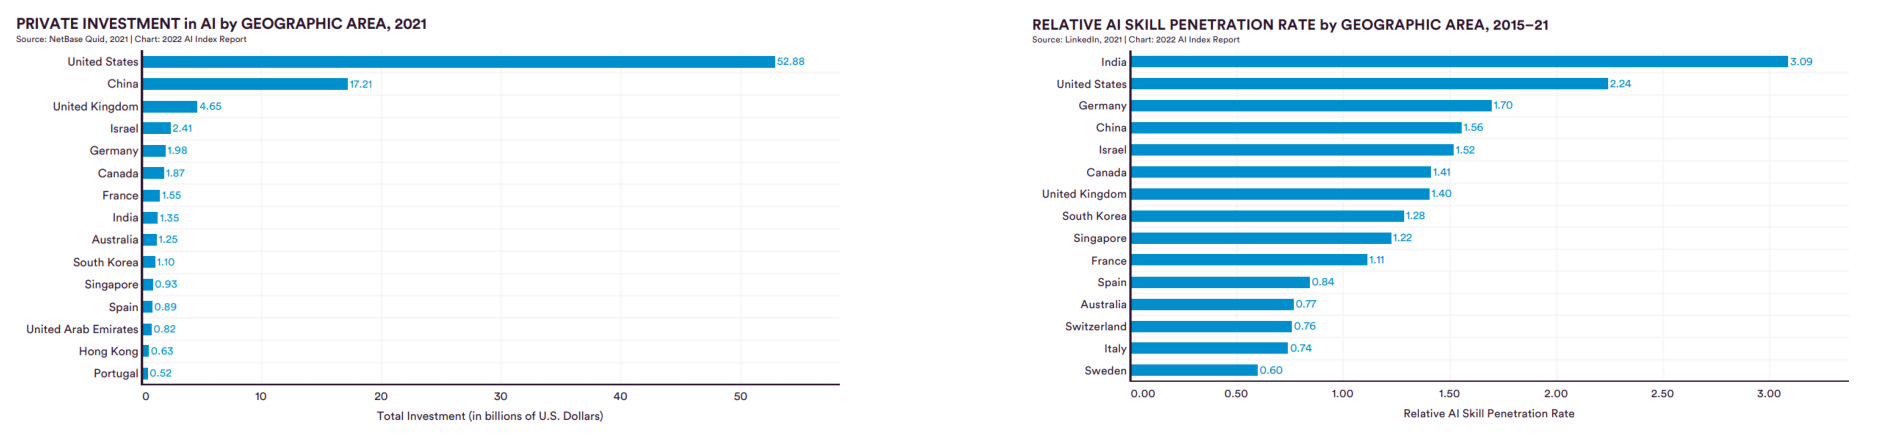

In [137]:
# Private Invesment in AI,2021. Source : Artificial Intelligence Index Report 2022
from PIL import Image
image1 = Image.open('/content/drive/MyDrive/Final Project/Kaggle Machine Learning Survey/Private Investment in AI 2021.PNG')
# Relative AI Skill rate. Source : Artificial Intelligence Index Report 2022
image2 = Image.open('/content/drive/MyDrive/Final Project/Kaggle Machine Learning Survey/Relative AI Skill.PNG')

fig, ax = plt.subplots(1,2,figsize = (24,16))
for a in ax:
    a.axis('off')
ax[0].imshow(image1)
ax[1].imshow(image2)
plt.show()

China and India are the two leading Asian countries in terms of investment and widespread adoption of AI skills in recent years.

Source : Artificial Intelligence Index Report 2022 from Stanford University

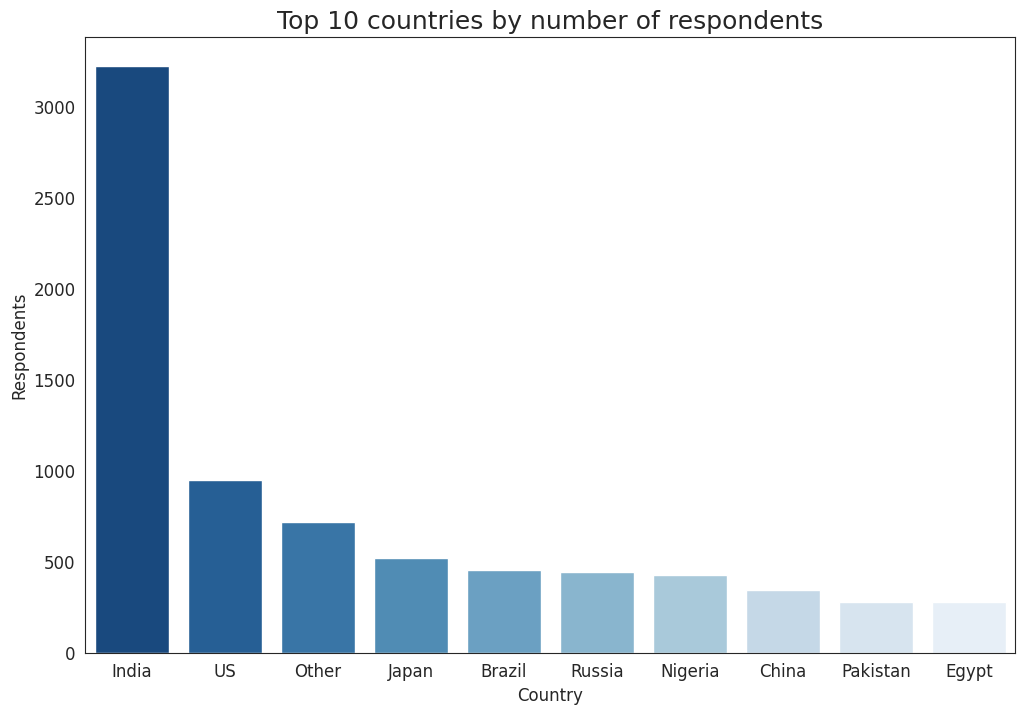

In [138]:
# Top 10 countries by number of survey respondents

palette = sns.color_palette("Blues", n_colors=10)[::-1]
plt.figure(figsize=(12,8))
sns.barplot(data=df1['Country'].value_counts().iloc[:10].reset_index(),
            x="index",
            y='Country',
            palette=palette)
plt.xlabel('Country')
plt.ylabel('Respondents')
plt.title('Top 10 countries by number of respondents',fontsize = 18)
plt.show()


These two countries also have the highest number of survey respondents.

I will choose these 2 countries to continue my analysis.

In [139]:
final_df = df1[df1['Country'].isin(['India','China'])]
final_df = final_df[~final_df['Role'].isin(['Other','Manager','Developer Relations/Advocacy','Currently not employed','Student'])]

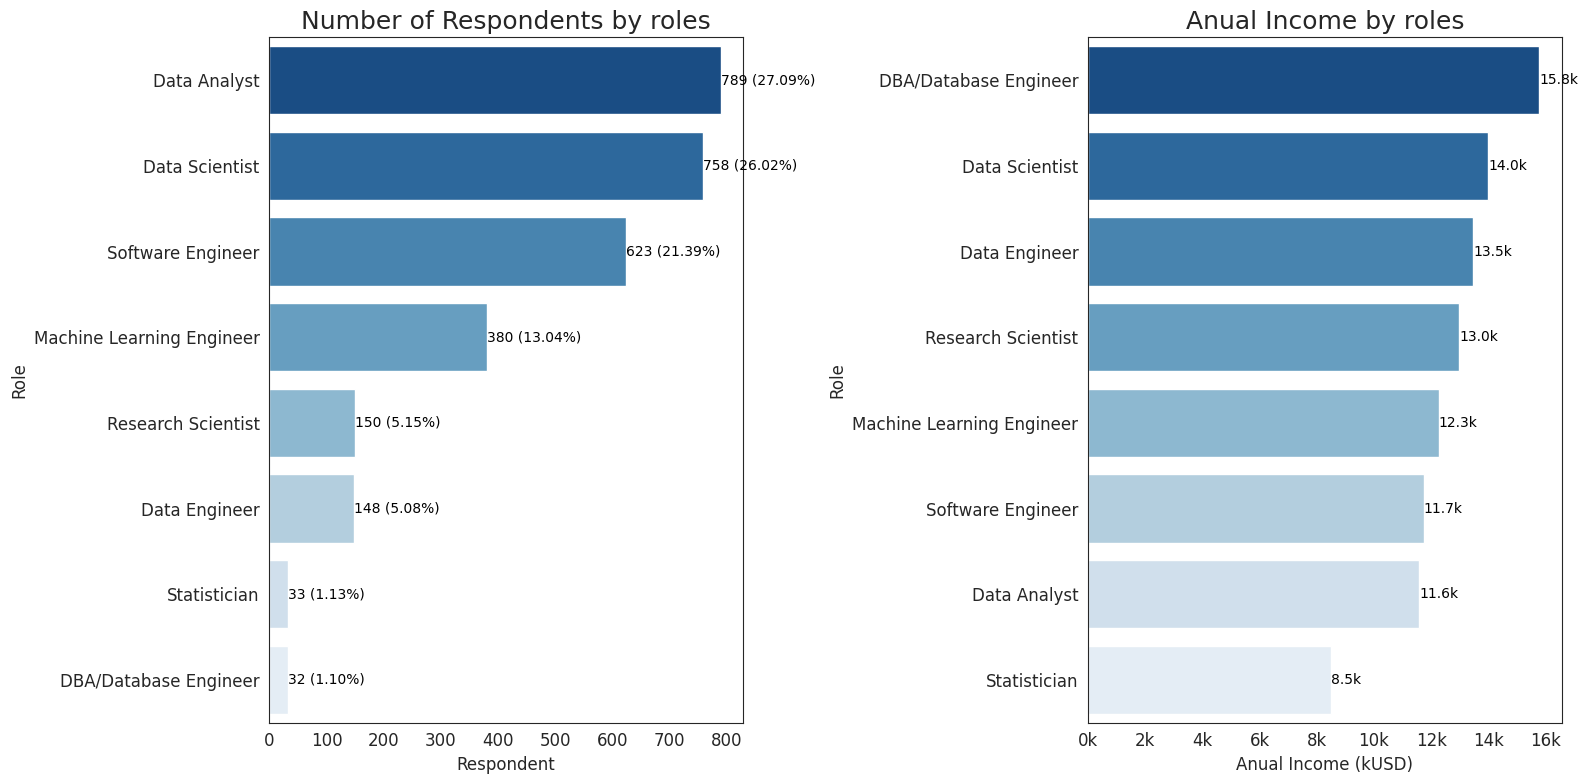

In [140]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
palette = sns.color_palette("Blues", n_colors=8)[::-1]
sns.barplot(data=final_df['Role'].value_counts().reset_index(),
            y="index",
            x='Role',
            palette=palette,
            ax = ax[0])
for i,v in enumerate(final_df['Role'].value_counts()):
  percentage = v / final_df['Role'].shape[0]*100
  ax[0].text(v+0.1, i, f'{v} ({percentage:.2f}%)',color='black', fontsize=10, ha='left', va='center')
ax[0].set_xlabel('Respondent')
ax[0].set_ylabel('Role')
ax[0].set_title('Number of Respondents by roles', fontsize = 18)

sns.barplot(data=final_df.groupby('Role')['Income'].mean().reset_index().sort_values('Income',ascending = False),
            x="Income",
            y='Role',
            palette=palette,
            ax = ax[1])
for i,v in enumerate(final_df.groupby('Role')['Income'].mean().reset_index().sort_values('Income',ascending = False).itertuples()):
  ax[1].text(v.Income+0.1, i, f'{v.Income/1000:.1f}k',color='black', fontsize=10, ha='left', va='center')
import matplotlib.ticker as mticker

# Create a custom format for the x . axis
def income_formatter(x, pos):
    return f'{x/1000:.0f}k'
ax[1].xaxis.set_major_formatter(mticker.FuncFormatter(income_formatter))
ax[1].set_xlabel('Anual Income (kUSD)')
ax[1].set_ylabel('Role')
ax[1].set_title('Anual Income by roles', fontsize = 18)
plt.tight_layout()
plt.show()


Data Scientist is the hottest role in these two countries as shown by:
  + Number of people responding
  + Anual Income belongs to the top in the role

I will focus on Data Scientist role for further analysis

#### 2/3 of Data Scientist has an income lower than average.

In [141]:
final_df = final_df[final_df['Role'].isin(['Data Scientist'])]
final_df = final_df[final_df['Income'].notna()]

In [142]:
final_df

,Duration (in seconds),Age,Gender,Country,Degree,Role,Coding Experience,Programming languages - Python,Programming languages - R,Programming languages - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - TensorBoard","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other",Anual Income,Age range
8,484,32.0,Man,India,Bachelor’s degree,Data Scientist,7.5,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,000-19,999",30-34
32,317,32.0,Man,India,Master’s degree,Data Scientist,7.5,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100,000-124,999",30-34
95,532,19.5,Man,India,Bachelor’s degree,Data Scientist,0.5,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0-999,18-21
142,566,27.0,Man,India,Master’s degree,Data Scientist,0.5,Python,NaN,NaN,...,TensorBoard,NaN,NaN,ClearML,NaN,MLflow,NaN,NaN,$0-999,25-29
154,502,23.0,Man,India,Bachelor’s degree,Data Scientist,4.0,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0-999,22-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25892,682,19.5,Man,India,Bachelor’s degree,Data Scientist,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,$0-999,18-21
25904,502,23.0,Man,India,Bachelor’s degree,Data Scientist,2.0,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,500-9,999",22-24
25922,20099,27.0,Man,India,Bachelor’s degree,Data Scientist,4.0,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,000-24,999",25-29
25931,2849,37.0,Man,India,Doctoral degree,Data Scientist,15.0,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000-14,999",35-39


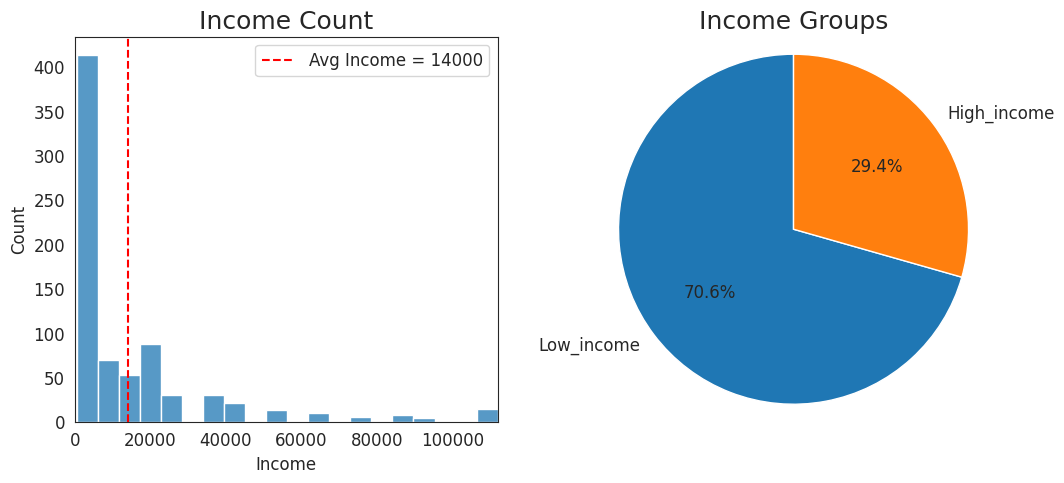

In [143]:
# Income count
fig,ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=final_df, x='Income',bins=20,ax=ax[0])
ax[0].axvline(x=14000, color='red', linestyle='--', label='Avg Income = 14000')
ax[0].set_xlim(0, 112000)

ax[0].set_xlabel('Income')
ax[0].set_ylabel('Count')
ax[0].set_title('Income Count', fontsize=18)
ax[0].legend()

# Group Income
Low_income = final_df[final_df['Income'] < 14000]['Age'].count() / final_df['Age'].count()
High_income = final_df[final_df['Income'] >= 14000]['Age'].count() / final_df['Age'].count()
labels = ['Low_income', 'High_income']
ratios = [Low_income, High_income]

ax[1].pie(ratios, labels=labels, autopct='%1.1f%%', startangle=90)
ax[1].set_title('Income Groups',fontsize = 18)
ax[1].axis('equal')
plt.show()


Income ranges from 0 to 112,000 US$/year.

However, more than 2/3 of Data Scientist has an income lower than average.

In [144]:
in_co_df = pd.concat([final_df.groupby('Coding Experience')['Income'].mean().reset_index(),final_df.groupby('Coding Experience')['Anual Income'].count().reset_index()],axis=1)
in_co_df = in_co_df.loc[:, ~in_co_df.columns.duplicated()]
in_co_df['Income'] = in_co_df['Income'].astype(int)
in_co_df['rank'] =  in_co_df['Coding Experience'].rank(method = 'dense') - 1
in_co_df

,Coding Experience,Income,Anual Income,rank
0,0.0,2525,30,0.0
1,0.5,4282,170,1.0
2,2.0,8702,275,2.0
3,4.0,16759,134,3.0
4,7.5,32410,100,4.0
5,15.0,39265,49,5.0


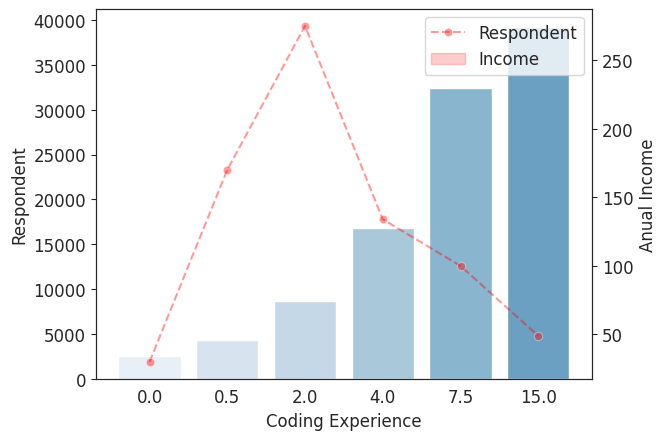

In [145]:
fig, ax = plt.subplots()
ax_twin = ax.twinx()
palette = sns.color_palette("Blues", n_colors=10)
sns.barplot(x="Coding Experience", y="Income", data=in_co_df, ax=ax,palette=palette )
sns.lineplot(x='rank', y='Anual Income', data=in_co_df, ax=ax_twin,color='red',alpha=0.4, marker='o',linestyle='dashed')
ax.set_xlabel('Coding Experience')
ax.set_ylabel('Income')
ax.set_ylabel('Respondent')
plt.legend(labels = ['Respondent', 'Income'])

This is the income equivalent to Coding Experience < 3 years.


## BQ: How can inexperienced Data Scientists increase their income?

Apply K-means clustering to group Income levels.

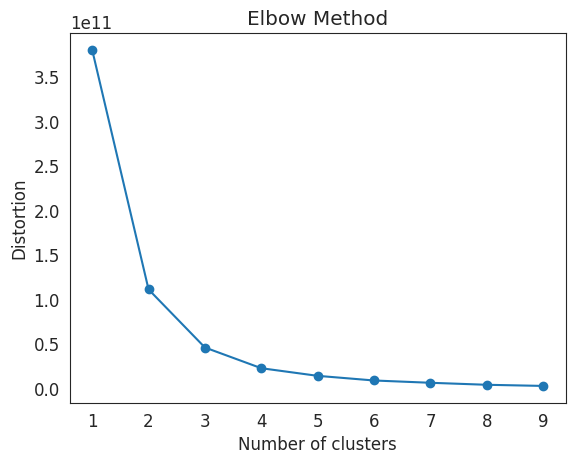

In [146]:
from sklearn.cluster import KMeans

# List the number of clusters
num_clusters_list = range(1, 10)

# List distortion
distortions = []

# Calculate distortion for each number of clusters
for num_clusters in num_clusters_list:
    kmeans = KMeans(n_clusters=num_clusters,n_init=10)
    kmeans.fit(final_df[['Income']])
    distortions.append(kmeans.inertia_)

# Distortion graph plot
plt.plot(num_clusters_list, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

In [147]:
# Determine the number of clusters
num_clusters = 3

# Apply K-means
kmeans = KMeans(n_clusters=num_clusters,random_state=0,n_init=10)
kmeans.fit(final_df[['Income']])

# Get the clustering label for each data sample
labels = kmeans.labels_

# Print clustering results
labels[:5]

array([1, 2, 0, 0, 0], dtype=int32)

In [148]:
final_df['Income level'] = labels + 1
final_df.head()
# Income level 1 : 0 => 12500 ( )
# Income level 2 : 17500 => 55000
# Income level 3 : 65000 => 112000

,Duration (in seconds),Age,Gender,Country,Degree,Role,Coding Experience,Programming languages - Python,Programming languages - R,Programming languages - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other",Anual Income,Age range,Income level
8,484,32.0,Man,India,Bachelor’s degree,Data Scientist,7.5,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,000-19,999",30-34,2
32,317,32.0,Man,India,Master’s degree,Data Scientist,7.5,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"100,000-124,999",30-34,3
95,532,19.5,Man,India,Bachelor’s degree,Data Scientist,0.5,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0-999,18-21,1
142,566,27.0,Man,India,Master’s degree,Data Scientist,0.5,Python,NaN,NaN,...,NaN,NaN,ClearML,NaN,MLflow,NaN,NaN,$0-999,25-29,1
154,502,23.0,Man,India,Bachelor’s degree,Data Scientist,4.0,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0-999,22-24,1


In [149]:
final_df = final_df[final_df['Income level'] != 3]
final_df

,Duration (in seconds),Age,Gender,Country,Degree,Role,Coding Experience,Programming languages - Python,Programming languages - R,Programming languages - SQL,...,"In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Guild.ai","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Polyaxon","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - ClearML","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Domino Model Monitor","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - MLflow","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - None","In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments? (Select all that apply) - Selected Choice - Other",Anual Income,Age range,Income level
8,484,32.0,Man,India,Bachelor’s degree,Data Scientist,7.5,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"15,000-19,999",30-34,2
95,532,19.5,Man,India,Bachelor’s degree,Data Scientist,0.5,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0-999,18-21,1
142,566,27.0,Man,India,Master’s degree,Data Scientist,0.5,Python,NaN,NaN,...,NaN,NaN,ClearML,NaN,MLflow,NaN,NaN,$0-999,25-29,1
154,502,23.0,Man,India,Bachelor’s degree,Data Scientist,4.0,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$0-999,22-24,1
230,613,27.0,Man,India,Bachelor’s degree,Data Scientist,0.5,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000-14,999",25-29,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25892,682,19.5,Man,India,Bachelor’s degree,Data Scientist,0.5,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,None,NaN,$0-999,18-21,1
25904,502,23.0,Man,India,Bachelor’s degree,Data Scientist,2.0,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"7,500-9,999",22-24,1
25922,20099,27.0,Man,India,Bachelor’s degree,Data Scientist,4.0,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"20,000-24,999",25-29,2
25931,2849,37.0,Man,India,Doctoral degree,Data Scientist,15.0,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"10,000-14,999",35-39,1


#### Data Scientist's main activities



Data Scientist has 2 main groups of activities: Data and Machine Learning.

In [150]:
Activity_df = pd.concat([final_df[final_df.columns[-1:]],final_df[final_df.columns[127:128]],final_df[final_df.columns[119:125]]],axis =1)
Activity_df.columns = Activity_df.columns.str.replace(r"Select any activities that make up an important part of your role at work: \(Select all that apply\) - Selected Choice - ", "", regex=True)
Activity_df

,Income level,Income,Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,Experimentation and iteration to improve existing ML models,Do research that advances the state of the art of machine learning
8,2,17500.0,NaN,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,NaN,NaN,NaN
95,1,500.0,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN
142,1,500.0,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN
154,1,500.0,NaN,NaN,NaN,NaN,NaN,NaN
230,1,12500.0,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN,Build and/or run a machine learning service th...,NaN,NaN
...,...,...,...,...,...,...,...,...
25892,1,500.0,Analyze and understand data to influence produ...,NaN,NaN,NaN,NaN,NaN
25904,1,8750.0,NaN,NaN,NaN,Build and/or run a machine learning service th...,NaN,NaN
25922,2,22500.0,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,NaN,Experimentation and iteration to improve exist...,NaN
25931,1,12500.0,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,Do research that advances the state of the art...


In [151]:
def count_act(x):
    count = x.count(axis=1)
    return count
Activity_df['Data act'] = count_act(Activity_df[Activity_df.columns[2:4]])
Activity_df['ML act'] = count_act(Activity_df[Activity_df.columns[4:8]])
Activity_df['Total act'] = Activity_df['Data act'] + Activity_df['ML act']
Activity_df.head()

,Income level,Income,Analyze and understand data to influence product or business decisions,"Build and/or run the data infrastructure that my business uses for storing, analyzing, and operationalizing data",Build prototypes to explore applying machine learning to new areas,Build and/or run a machine learning service that operationally improves my product or workflows,Experimentation and iteration to improve existing ML models,Do research that advances the state of the art of machine learning,Data act,ML act,Total act
8,2,17500.0,NaN,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,NaN,NaN,NaN,1,1,2
95,1,500.0,Analyze and understand data to influence produ...,NaN,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,1,3,4
142,1,500.0,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,Build prototypes to explore applying machine l...,Build and/or run a machine learning service th...,Experimentation and iteration to improve exist...,NaN,2,3,5
154,1,500.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
230,1,12500.0,Analyze and understand data to influence produ...,Build and/or run the data infrastructure that ...,NaN,Build and/or run a machine learning service th...,NaN,NaN,2,1,3


#### What skills impact income?

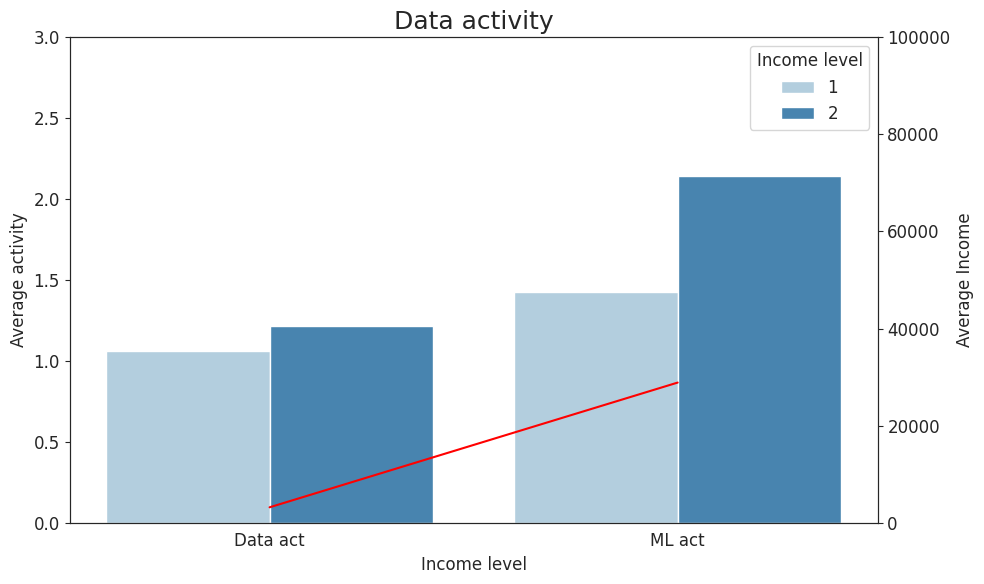

In [152]:
activity_means = Activity_df.groupby('Income level')[['Data act','ML act']].mean().reset_index()
activity_means = activity_means.melt("Income level", var_name="Act", value_name="Ratio")
income_means = Activity_df.groupby('Income level')['Income'].mean().reset_index()

plt.figure(figsize=(10,6))
palette = sns.color_palette("Blues", n_colors=2)
ax1 = sns.barplot(data=activity_means, x='Act', y='Ratio', hue='Income level', palette=palette)
ax2 = ax1.twinx()
sns.lineplot(data=income_means, x=income_means.index, y='Income', color='red', ax=ax2)

ax1.set_xlabel('Income level')
ax1.set_ylabel('Average activity')
ax2.set_ylabel('Average Income')

ax1.set_title('Data activity', fontsize=18)
ax1.set_ylim(0, 3)
ax2.set_ylim(0,100000)  # Để giữ y-axis cho thu nhập tự động điều chỉnh

plt.tight_layout()
plt.show()


It can be seen that ML act is the main activity to help improve Income of DS.


In [153]:
def mean_count(df, groupby_col, count_cols,col_name):
    count_df = df[count_cols].count(axis='columns').to_frame(col_name)
    new_df = pd.concat([df[[groupby_col]], count_df[col_name]], axis=1).reset_index()
    new_df_rate = new_df.groupby(groupby_col)[col_name].mean().reset_index()
    result = round(new_df_rate, 2)
    return result


In [154]:
def calculate_rate(df, groupby_col, count_cols):
    new_df = pd.concat([df[[groupby_col]], df[count_cols]], axis=1).reset_index()
    count_group = new_df.groupby(groupby_col)[groupby_col].count()
    new_df_rate = new_df.groupby(groupby_col)[count_cols].count()
    result = round(new_df_rate.div(count_group,axis=0)*100, 1)
    return result

#### Priority skills to learn

In [155]:
ML_act = pd.concat([Activity_df[Activity_df.columns[:1]],Activity_df[Activity_df.columns[3:-2]]],axis =1)
ML_act = ML_act[['Income level','Do research that advances the state of the art of machine learning','Build prototypes to explore applying machine learning to new areas','Experimentation and iteration to improve existing ML models','Build and/or run a machine learning service that operationally improves my product or workflows']]
ML_act

,Income level,Do research that advances the state of the art of machine learning,Build prototypes to explore applying machine learning to new areas,Experimentation and iteration to improve existing ML models,Build and/or run a machine learning service that operationally improves my product or workflows
8,2,NaN,Build prototypes to explore applying machine l...,NaN,NaN
95,1,NaN,Build prototypes to explore applying machine l...,Experimentation and iteration to improve exist...,Build and/or run a machine learning service th...
142,1,NaN,Build prototypes to explore applying machine l...,Experimentation and iteration to improve exist...,Build and/or run a machine learning service th...
154,1,NaN,NaN,NaN,NaN
230,1,NaN,NaN,NaN,Build and/or run a machine learning service th...
...,...,...,...,...,...
25892,1,NaN,NaN,NaN,NaN
25904,1,NaN,NaN,NaN,Build and/or run a machine learning service th...
25922,2,NaN,Build prototypes to explore applying machine l...,Experimentation and iteration to improve exist...,NaN
25931,1,Do research that advances the state of the art...,Build prototypes to explore applying machine l...,Experimentation and iteration to improve exist...,Build and/or run a machine learning service th...


In [156]:
ML_act[ML_act.columns[1:]] = ML_act[ML_act.columns[1:]].notnull().astype('int')
ML_act

,Income level,Do research that advances the state of the art of machine learning,Build prototypes to explore applying machine learning to new areas,Experimentation and iteration to improve existing ML models,Build and/or run a machine learning service that operationally improves my product or workflows
8,2,0,1,0,0
95,1,0,1,1,1
142,1,0,1,1,1
154,1,0,0,0,0
230,1,0,0,0,1
...,...,...,...,...,...
25892,1,0,0,0,0
25904,1,0,0,0,1
25922,2,0,1,1,0
25931,1,1,1,1,1


In [157]:
ML_act_mean = ML_act.groupby('Income level')[ML_act.columns[1:]].mean().reset_index()
ML_act_mean

,Income level,Do research that advances the state of the art of machine learning,Build prototypes to explore applying machine learning to new areas,Experimentation and iteration to improve existing ML models,Build and/or run a machine learning service that operationally improves my product or workflows
0,1,0.300935,0.400000,0.375701,0.349533
1,2,0.357143,0.686813,0.538462,0.560440


In [158]:
keep_cl = ML_act_mean.columns[:1]
convert_cl = ML_act_mean.columns[1:]

ML_act_cv = ML_act_mean.melt(id_vars=keep_cl,
                             value_vars=convert_cl,
                             var_name = 'ML act',
                             value_name = 'rate')
ML_act_cv

,Income level,ML act,rate
0,1,Do research that advances the state of the art...,0.300935
1,2,Do research that advances the state of the art...,0.357143
2,1,Build prototypes to explore applying machine l...,0.400000
3,2,Build prototypes to explore applying machine l...,0.686813
4,1,Experimentation and iteration to improve exist...,0.375701
5,2,Experimentation and iteration to improve exist...,0.538462
6,1,Build and/or run a machine learning service th...,0.349533
7,2,Build and/or run a machine learning service th...,0.560440


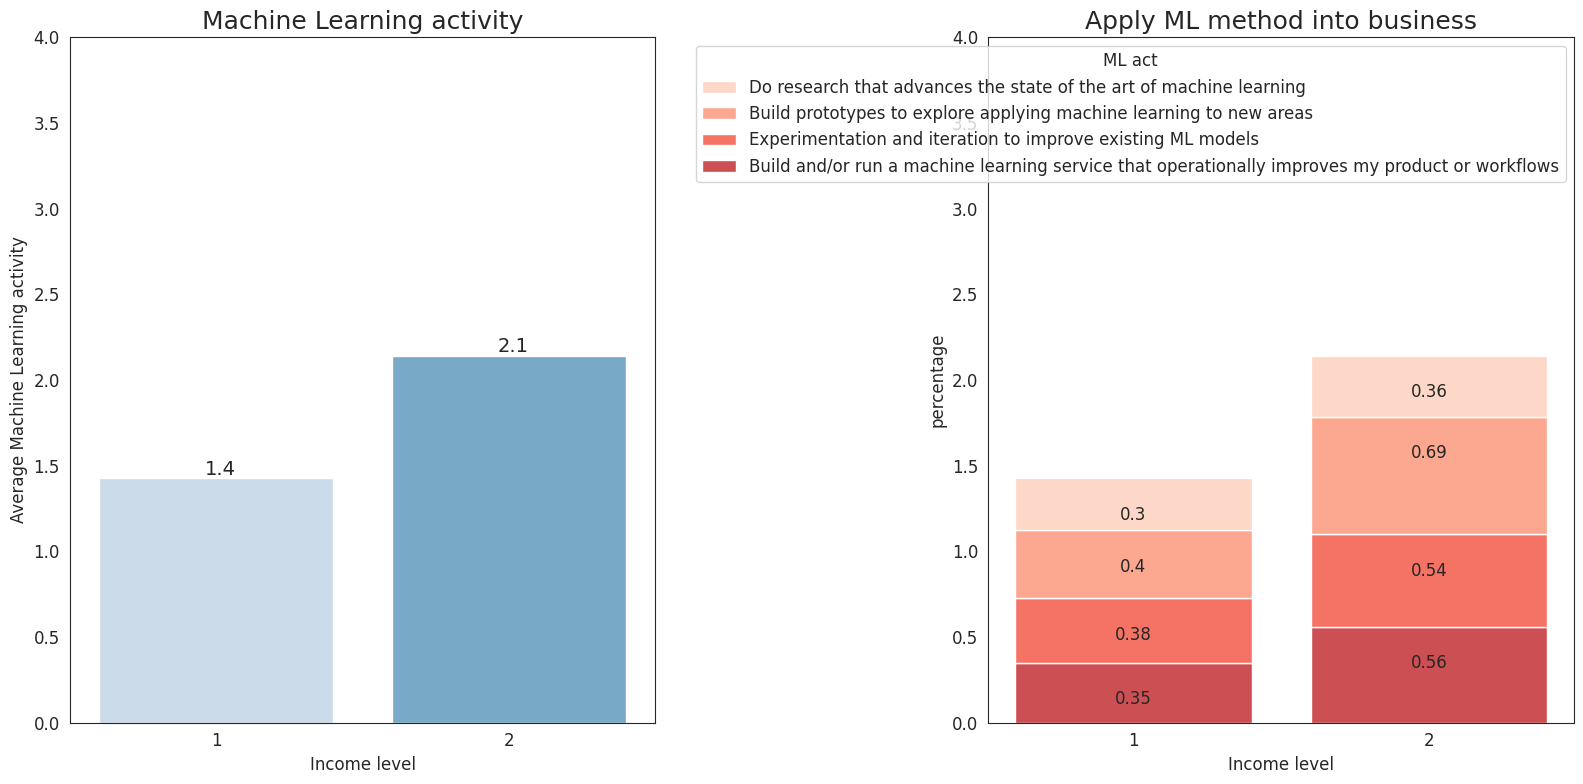

In [159]:
activity_means = Activity_df.groupby('Income level')['ML act'].mean().reset_index()

fig,ax = plt.subplots(1,2,figsize = (16,8))
palette1 = sns.color_palette("Blues", n_colors=3)
palette2 = sns.color_palette("Reds", n_colors=4)
sns.barplot(data =activity_means,x='Income level', y='ML act',palette = palette1,ax=ax[0])
ax[0].set_xlabel('Income level')
ax[0].set_ylabel('Average Machine Learning activity')
ax[0].set_title('Machine Learning activity',fontsize = 18)
ax[0].set_ylim(0,4)
for i, v in enumerate(activity_means['ML act']):
    ax[0].text(i-0.04, v + 0.02, f'{v:.2}', fontsize=14)

sns.histplot(ML_act_cv,x= ML_act_cv['Income level'].astype(str), hue = 'ML act',weights='rate',multiple='stack',palette = palette2,shrink=0.8)
ax[1] = plt.gca()
ax[1].set_ylabel('percentage')
ax[1].set_title('Apply ML method into business',fontsize = 18)
for p in ax[1].containers:
    for q in p:
        # iterate over patches in container (one patch per x bin)
        x = q.get_x() + q.get_width() / 2 # x-coordinate of the center of the bar
        y = q.get_y() + q.get_height() # y-coordinate of the top of the bar
        value = q.get_height() # height of the bar
        ax[1].annotate(f'{value:.2}', (x, y), xytext=(0,-30), textcoords='offset points', ha='center', fontsize=12)
ax[1].set_ylim(0,4)
legend = ax[1].get_legend()
legend.set_bbox_to_anchor((1, 1))
plt.tight_layout()
plt.show()

So what do you need to learn to be able to take on these 3 activities?

##### 1.Build prototypes to explore applying machine learning to new areas

In [160]:
fw_rate = calculate_rate(final_df,'Income level',final_df.columns[72:88])
fw_rate.columns = fw_rate.columns.str.replace(r"Machine Learning frameworks - ", "", regex=True)
fw_rate =fw_rate.T.sort_values(2).reset_index()
fw_rate

Income level,index,1,2
0,JAX,0.9,1.1
1,MXNet,1.5,3.8
2,Tidymodels,2.4,3.8
3,H2O 3,2.8,5.5
4,PyTorch Lightning,7.9,8.8
5,Fast.ai,4.1,9.9
6,Prophet,6.5,12.6
7,Caret,3.6,15.4
8,CatBoost,9.9,20.3
9,Huggingface,6.9,20.3


In [161]:
count_fw = mean_count(final_df,'Income level',final_df.columns[72:88],'Count').reset_index()
count_fw

,index,Income level,Count
0,0,1,2.98
1,1,2,4.47


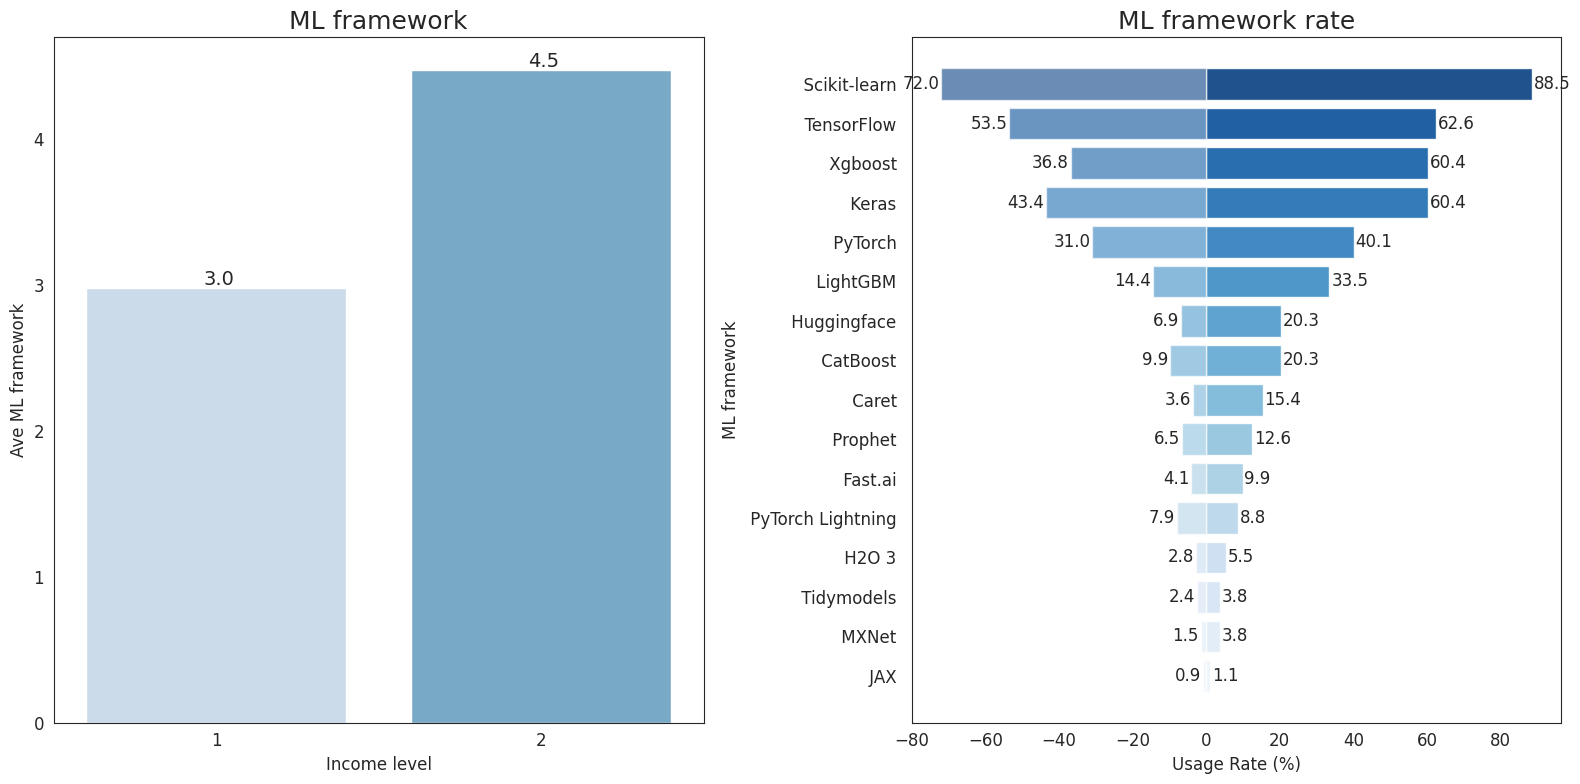

In [162]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
palette1 = sns.color_palette('Blues',n_colors = 3)
palette2 = sns.color_palette('Blues',n_colors = 16)[::]
sns.barplot(data = count_fw, x = 'Income level',y = 'Count',palette =palette1,ax=ax[0])
for i, v in enumerate(count_fw['Count']):
    ax[0].text(i-0.04, v + 0.02, f'{v:.2}', fontsize=14)
ax[0].set_title('ML framework', fontsize = 18)
ax[0].set_ylabel('Ave ML framework')

ax[1].barh(fw_rate['index'],fw_rate[2].values,align='center',
         alpha=0.9, color = palette2)
ax[1].barh(fw_rate['index'],-fw_rate[1].values,align='center',
         alpha=0.6, color = palette2)
for i, (index, value) in enumerate(zip(fw_rate['index'], fw_rate[2].values)):
    ax[1].text(value + 0.5, i, str(value), ha='left', va='center')

for i, (index, value) in enumerate(zip(fw_rate['index'], fw_rate[1].values)):
    ax[1].text(-value - 0.5, i, str(value), ha='right', va='center')
ax[1].set_title('ML framework rate',fontsize=18)
ax[1].set_ylabel('ML framework')
ax[1].set_xlabel('Usage Rate (%)')
plt.tight_layout()
plt.show()

Income level 2 is 1.5 times more than Income level 1.

This difference comes from the Xgboost, LightGBM, and CatBoost frameworks.
These are powerful frameworks for building gradient-boosting models

In [163]:
algo_ml = calculate_rate(final_df,'Income level',final_df.columns[90:100])
algo_ml.columns = algo_ml.columns.str.replace(r"Machine Learning algorithms - ", "", regex=True)
algo_ml  = algo_ml.T.sort_values(2).reset_index()
algo_ml

Income level,index,1,2
0,Evolutionary Approaches,6.2,6.6
1,Generative Adversarial Networks,7.1,8.8
2,"Transformer Networks (BERT, gpt-3, etc)",13.6,29.1
3,Recurrent Neural Networks,27.7,30.8
4,"Dense Neural Networks (MLPs, etc)",22.1,33.0
5,Bayesian Approaches,25.0,34.1
6,Convolutional Neural Networks,37.2,48.4
7,"Gradient Boosting Machines (xgboost, lightgbm,...",48.6,69.8
8,Decision Trees or Random Forests,65.0,79.7
9,Linear or Logistic Regression,74.4,83.0


In [164]:
count_al = mean_count(final_df,'Income level',final_df.columns[90:100],'Count').reset_index()
count_al

,index,Income level,Count
0,0,1,3.27
1,1,2,4.23


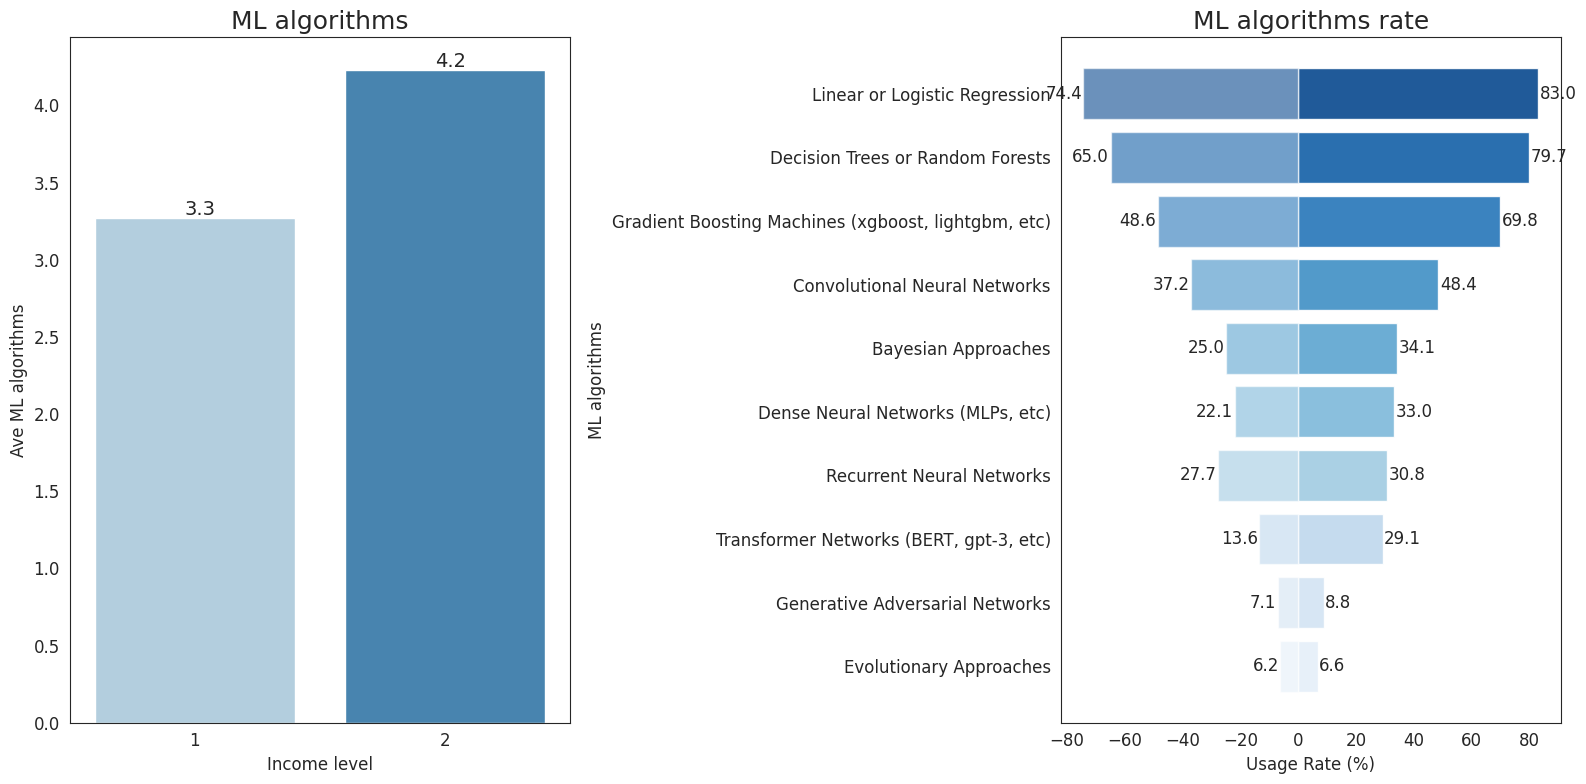

In [165]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
palette1 = sns.color_palette('Blues',n_colors = 2)
palette2 = sns.color_palette('Blues',n_colors = 10)
sns.barplot(data = count_al, x = 'Income level',y = 'Count',palette =palette1,ax=ax[0])
for i, v in enumerate(count_al['Count']):
    ax[0].text(i-0.04, v + 0.02, f'{v:.2}', fontsize=14)
ax[0].set_title('ML algorithms', fontsize = 18)
ax[0].set_ylabel('Ave ML algorithms')

ax[1].barh(algo_ml['index'],algo_ml[2].values,align='center',
         alpha=0.9, color = palette2)
ax[1].barh(algo_ml['index'],-algo_ml[1].values,align='center',
         alpha=0.6, color = palette2)
for i, (index, value) in enumerate(zip(algo_ml['index'], algo_ml[2].values)):
    ax[1].text(value + 0.5, i, str(value), ha='left', va='center')

for i, (index, value) in enumerate(zip(algo_ml['index'], algo_ml[1].values)):
    ax[1].text(-value - 0.5, i, str(value), ha='right', va='center')
ax[1].set_title('ML algorithms rate',fontsize=18)
ax[1].set_ylabel('ML algorithms')
ax[1].set_xlabel('Usage Rate (%)')
plt.tight_layout()
plt.show()

Gradient-boosting algorithms have a difference, which is consistent with the above analysis.

In addition, NLP techniques (Transformer Networks and Dense Neural Networks ) also exhibit significant differences between the two groups.

In [166]:
nlp_ml = calculate_rate(final_df,'Income level',final_df.columns[109:113])
nlp_ml.columns = nlp_ml.columns.str.replace(r"NLP methods - ", "", regex=True)
nlp_ml  = nlp_ml.T.sort_values(2).reset_index()
nlp_ml

Income level,index,1,2
0,"Contextualized embeddings (ELMo, CoVe)",9.3,13.2
1,"Encoder-decorder models (seq2seq, vanilla tran...",16.6,22.0
2,"Word embeddings/vectors (GLoVe, fastText, word...",21.1,31.3
3,"Transformer language models (GPT-3, BERT, XLne...",17.4,32.4


In [167]:
count_nlp = mean_count(final_df,'Income level',final_df.columns[109:113],'Count').reset_index()
count_nlp

,index,Income level,Count
0,0,1,0.64
1,1,2,0.99


<ipython-input-168-ebbba66a14eb>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_yticklabels(yticklabels)


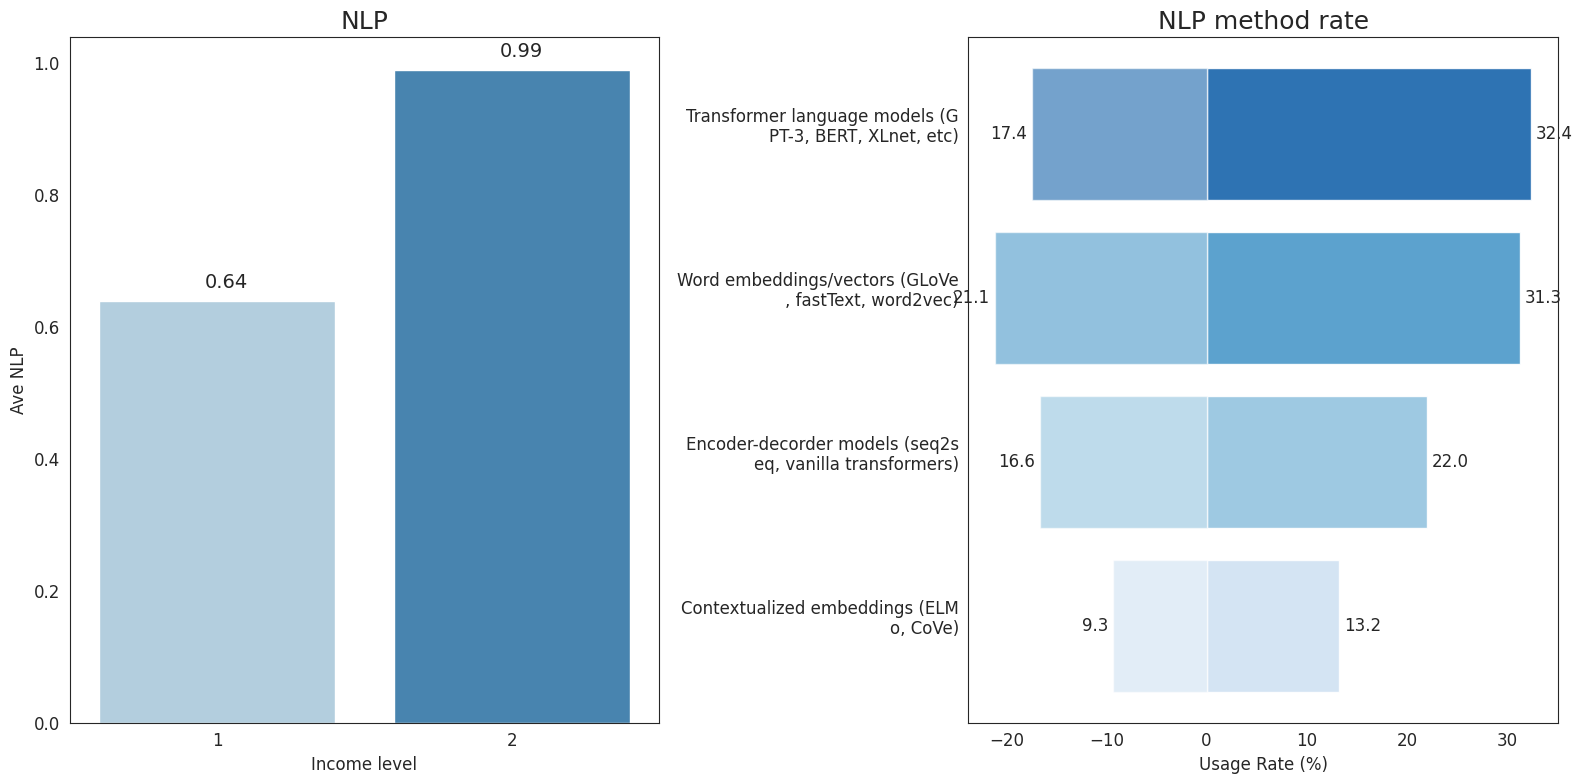

In [168]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
palette1 = sns.color_palette('Blues', n_colors=2)
palette2 = sns.color_palette('Blues', n_colors=4)

sns.barplot(data=count_nlp, x='Income level', y='Count', palette=palette1, ax=ax[0])
for i, v in enumerate(count_nlp['Count']):
    ax[0].text(i - 0.04, v + 0.02, f'{v:.2}', fontsize=14)
ax[0].set_title('NLP', fontsize=18)
ax[0].set_ylabel('Ave NLP')

ax[1].barh(nlp_ml['index'],nlp_ml[2].values,align='center',
         alpha=0.9, color = palette2)
ax[1].barh(nlp_ml['index'],-nlp_ml[1].values,align='center',
         alpha=0.6, color = palette2)
for i, (index, value) in enumerate(zip(nlp_ml['index'], nlp_ml[2].values)):
    ax[1].text(value + 0.5, i, str(value), ha='left', va='center')

for i, (index, value) in enumerate(zip(nlp_ml['index'], nlp_ml[1].values)):
    ax[1].text(-value - 0.5, i, str(value), ha='right', va='center')
ax[1].set_title('NLP method rate',fontsize=18)
ax[1].set_ylabel('NLP method')
ax[1].set_xlabel('Usage Rate (%)')
ax[1].set_ylabel('')

yticklabels = [f'{label[:30]}\n{label[30:70]}\n{label[70:]}' if len(label) > 10 else label for label in nlp_ml['index']]
ax[1].set_yticklabels(yticklabels)

plt.tight_layout()
plt.show()

The most common NLP methods are Transformer language models (GPT-3, BERT, XLnet, etc).

##### 2.Experimentation and iteration to improve existing ML models

In [169]:
Pro_ML_rate = calculate_rate(final_df,'Income level',final_df.columns[155:163])
Pro_ML_rate.columns = Pro_ML_rate.columns.str.replace(r"Do you use any of the following managed machine learning products on a regular basis\? \(Select all that apply\) - Selected Choice -  ", "", regex=True)
Pro_ML_rate =Pro_ML_rate.T.sort_values(2).reset_index()
Pro_ML_rate

Income level,index,1,2
0,Dataiku,2.4,2.2
1,Rapidminer,1.7,2.7
2,DataRobot,3.7,3.3
3,Alteryx,2.2,4.9
4,Google Cloud Vertex AI,5.8,8.8
5,Azure Machine Learning Studio,9.5,17.0
6,Databricks,7.5,18.7
7,Amazon SageMaker,9.3,19.2


In [170]:
count_Pro_ML = mean_count(final_df,'Income level',final_df.columns[155:163],'Count').reset_index()
count_Pro_ML

,index,Income level,Count
0,0,1,0.42
1,1,2,0.77


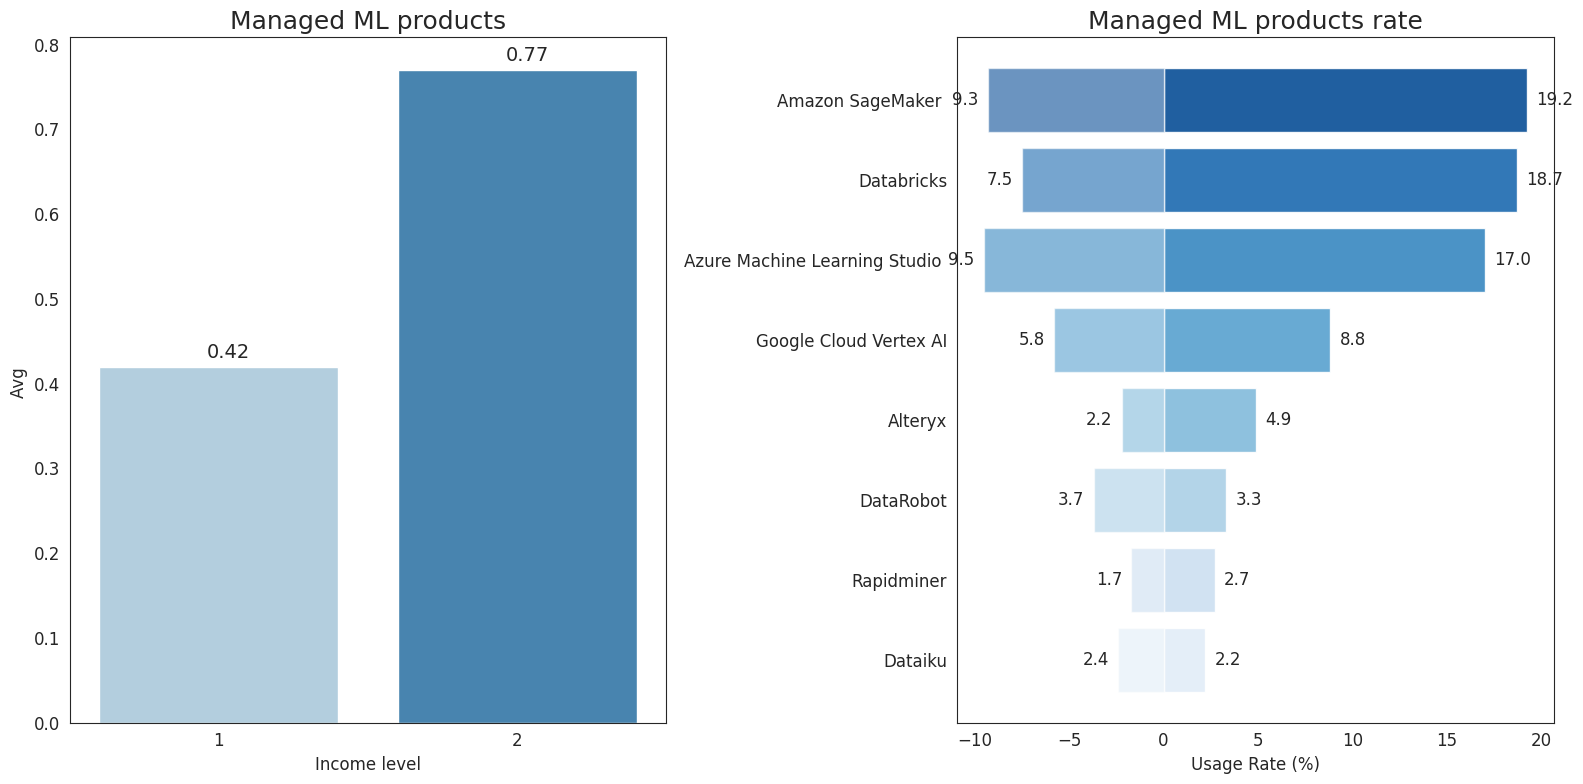

In [171]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
palette1 = sns.color_palette('Blues', n_colors=2)
palette2 = sns.color_palette('Blues', n_colors=8)

sns.barplot(data=count_Pro_ML, x='Income level', y='Count', palette=palette1, ax=ax[0])
for i, v in enumerate(count_Pro_ML['Count']):
    ax[0].text(i - 0.04, v + 0.01, f'{v:.2}', fontsize=14)
ax[0].set_title('Managed ML products', fontsize=18)
ax[0].set_ylabel('Avg ')

ax[1].barh(Pro_ML_rate['index'],Pro_ML_rate[2].values,align='center',
         alpha=0.9, color = palette2)
ax[1].barh(Pro_ML_rate['index'],-Pro_ML_rate[1].values,align='center',
         alpha=0.6, color = palette2)
for i, (index, value) in enumerate(zip(Pro_ML_rate['index'], Pro_ML_rate[2].values)):
    ax[1].text(value + 0.5, i, str(value), ha='left', va='center')

for i, (index, value) in enumerate(zip(Pro_ML_rate['index'], Pro_ML_rate[1].values)):
    ax[1].text(-value - 0.5, i, str(value), ha='right', va='center')
ax[1].set_title('Managed ML products rate',fontsize=18)
ax[1].set_ylabel('Managed ML products')
ax[1].set_xlabel('Usage Rate (%)')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Top 3 platforms for Managing ML models are:

 - Amazon SageMaker

 - Databricks

 - Azure Machine Learning Studio


In [172]:
Tool_ML_rate = calculate_rate(final_df,'Income level',final_df.columns[221:231])
Tool_ML_rate.columns = Tool_ML_rate.columns.str.replace(r"Do you use any tools to help manage machine learning experiments\? \(Select all that apply\) - Selected Choice -  ", "", regex=True)
Tool_ML_rate =Tool_ML_rate.T.sort_values(2).reset_index()
Tool_ML_rate

Income level,index,1,2
0,Sacred + Omniboard,1.9,0.0
1,Polyaxon,2.2,0.5
2,Domino Model Monitor,1.3,0.5
3,Comet.ml,1.5,1.6
4,Guild.ai,2.2,1.6
5,ClearML,2.1,1.6
6,Neptune.ai,2.6,2.2
7,Weights & Biases,5.0,7.7
8,MLflow,9.2,15.9
9,TensorBoard,15.3,20.9


In [173]:
count_Tool_ML = mean_count(final_df,'Income level',final_df.columns[221:231],'Count').reset_index()
count_Tool_ML

,index,Income level,Count
0,0,1,0.43
1,1,2,0.53


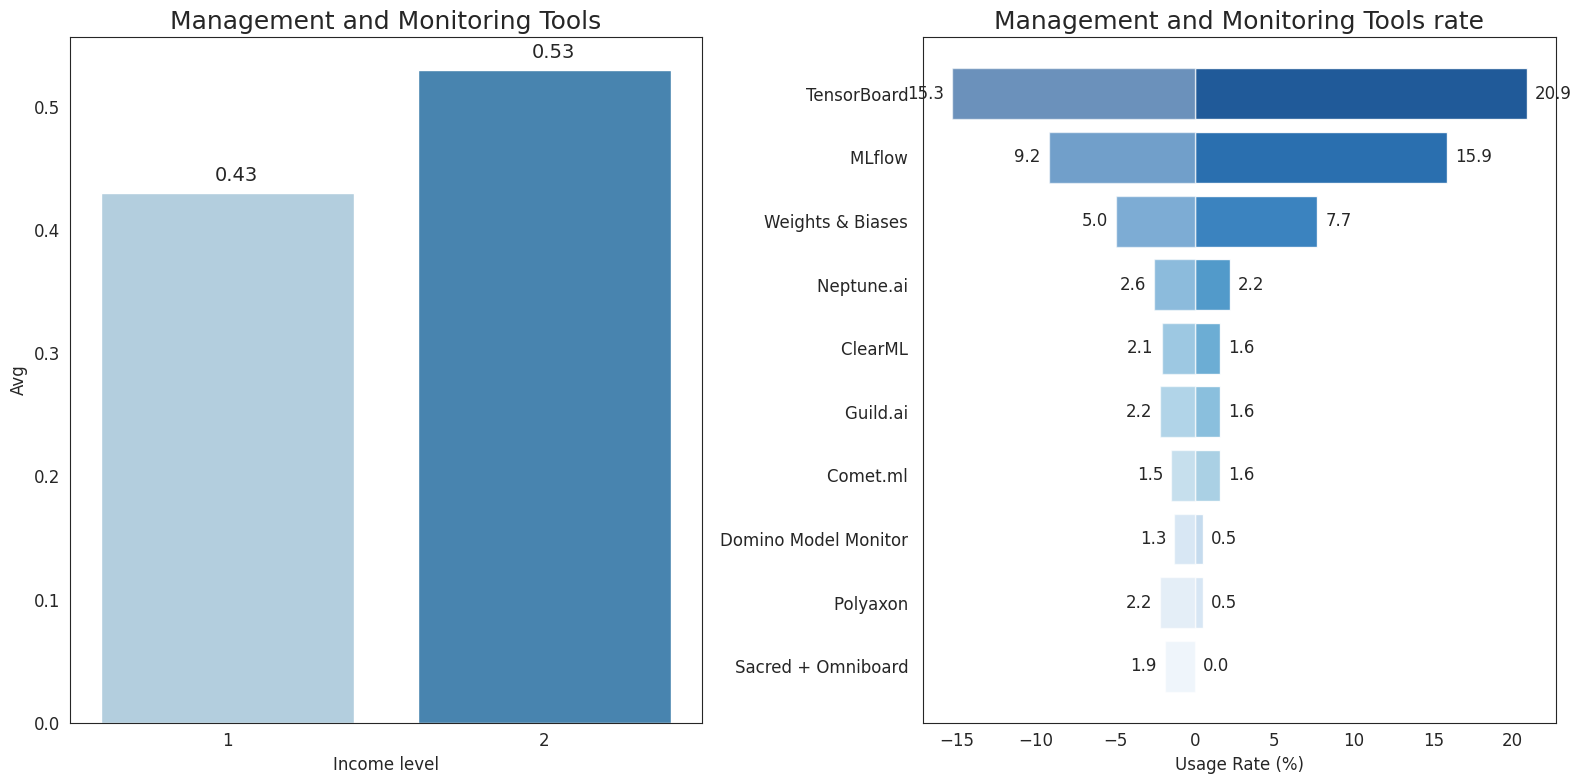

In [174]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
palette1 = sns.color_palette('Blues', n_colors=2)
palette2 = sns.color_palette('Blues', n_colors=10)

sns.barplot(data=count_Tool_ML, x='Income level', y='Count', palette=palette1, ax=ax[0])
for i, v in enumerate(count_Tool_ML['Count']):
    ax[0].text(i - 0.04, v + 0.01, f'{v:.2}', fontsize=14)
ax[0].set_title('Management and Monitoring Tools', fontsize=18)
ax[0].set_ylabel('Avg')

ax[1].barh(Tool_ML_rate['index'],Tool_ML_rate[2].values,align='center',
         alpha=0.9, color = palette2)
ax[1].barh(Tool_ML_rate['index'],-Tool_ML_rate[1].values,align='center',
         alpha=0.6, color = palette2)
for i, (index, value) in enumerate(zip(Tool_ML_rate['index'], Tool_ML_rate[2].values)):
    ax[1].text(value + 0.5, i, str(value), ha='left', va='center')

for i, (index, value) in enumerate(zip(Tool_ML_rate['index'], Tool_ML_rate[1].values)):
    ax[1].text(-value - 0.5, i, str(value), ha='right', va='center')
ax[1].set_title('Management and Monitoring Tools rate',fontsize=18)
ax[1].set_ylabel('Management and Monitoring Tools')
ax[1].set_xlabel('Usage Rate (%)')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Top 3 tools for Monitoring ML models are:

 - TensorBoard.

 - MLflow.

 - Weights& Biases

##### 3.Build and/or run a machine learning service that operationally improves my product or workflows

In [175]:
cl_rate = calculate_rate(final_df,'Income level',final_df.columns[129:139])
cl_rate.columns = cl_rate.columns.str.replace(r"Which of the following cloud computing platforms do you use on a regular basis\? \(Select all that apply\) - Selected Choice - ", "", regex=True)
cl_rate =cl_rate.T.sort_values(2).reset_index()
cl_rate

Income level,index,1,2
0,Alibaba Cloud,2.4,1.6
1,Tencent Cloud,1.1,1.6
2,SAP Cloud,2.4,3.3
3,Oracle Cloud,3.7,3.8
4,Salesforce Cloud,1.5,3.8
5,VMware Cloud,3.2,3.8
6,IBM Cloud / Red Hat,6.2,4.4
7,Google Cloud Platform (GCP),19.3,26.4
8,Microsoft Azure,16.1,34.6
9,Amazon Web Services (AWS),26.0,41.2


In [176]:
count_cl = mean_count(final_df,'Income level',final_df.columns[129:139],'Count').reset_index()
count_cl

,index,Income level,Count
0,0,1,0.82
1,1,2,1.25


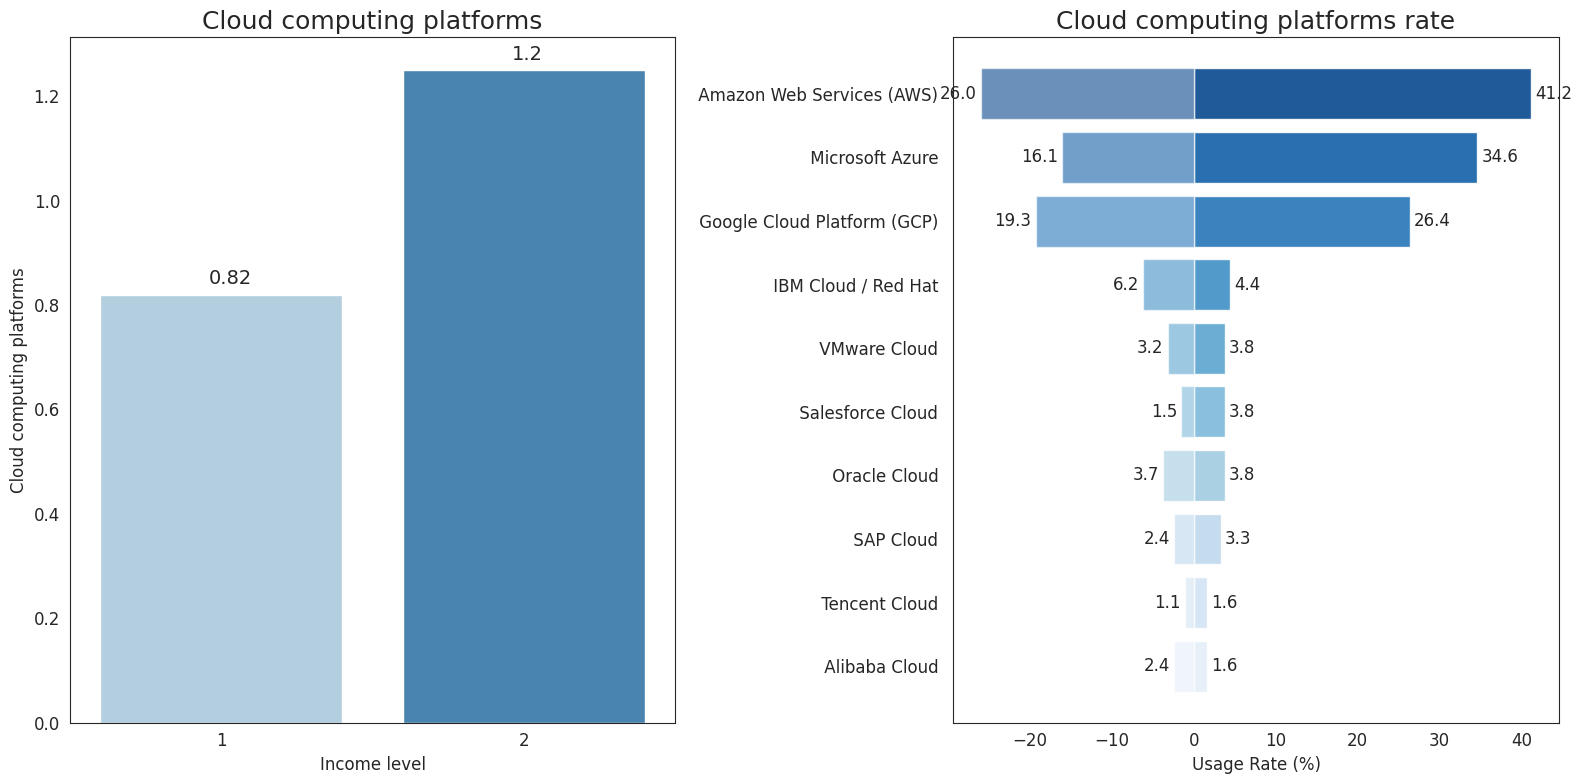

In [177]:
fig, ax = plt.subplots(1, 2, figsize=(16, 8))
palette1 = sns.color_palette('Blues', n_colors=2)
palette2 = sns.color_palette('Blues', n_colors=10)

sns.barplot(data=count_cl, x='Income level', y='Count', palette=palette1, ax=ax[0])
for i, v in enumerate(count_cl['Count']):
    ax[0].text(i - 0.04, v + 0.02, f'{v:.2}', fontsize=14)
ax[0].set_title('Cloud computing platforms', fontsize=18)
ax[0].set_ylabel('Cloud computing platforms')

ax[1].barh(cl_rate['index'],cl_rate[2].values,align='center',
         alpha=0.9, color = palette2)
ax[1].barh(cl_rate['index'],-cl_rate[1].values,align='center',
         alpha=0.6, color = palette2)
for i, (index, value) in enumerate(zip(cl_rate['index'], cl_rate[2].values)):
    ax[1].text(value + 0.5, i, str(value), ha='left', va='center')

for i, (index, value) in enumerate(zip(cl_rate['index'], cl_rate[1].values)):
    ax[1].text(-value - 0.5, i, str(value), ha='right', va='center')
ax[1].set_title('Cloud computing platforms rate',fontsize=18)
ax[1].set_ylabel('Cloud computing platforms')
ax[1].set_xlabel('Usage Rate (%)')
ax[1].set_ylabel('')

plt.tight_layout()
plt.show()

Top 3 platforms for Cloud computing service are:

 - Amazon Web Services (AWS)

 - Microsoft Azure

 - Google Cloud Platform (GCP)

In [178]:
spent_cl = round(final_df.groupby('Income level')['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?'].mean().reset_index(),1)
spent_cl.columns = ['Income level','Spent on ML/Cloud computing servises']
spent_cl

,Income level,Spent on ML/Cloud computing servises
0,1,4154.1
1,2,19609.7


Text(0.5, 1.0, 'Money spent on ML/Cloud computing servises')

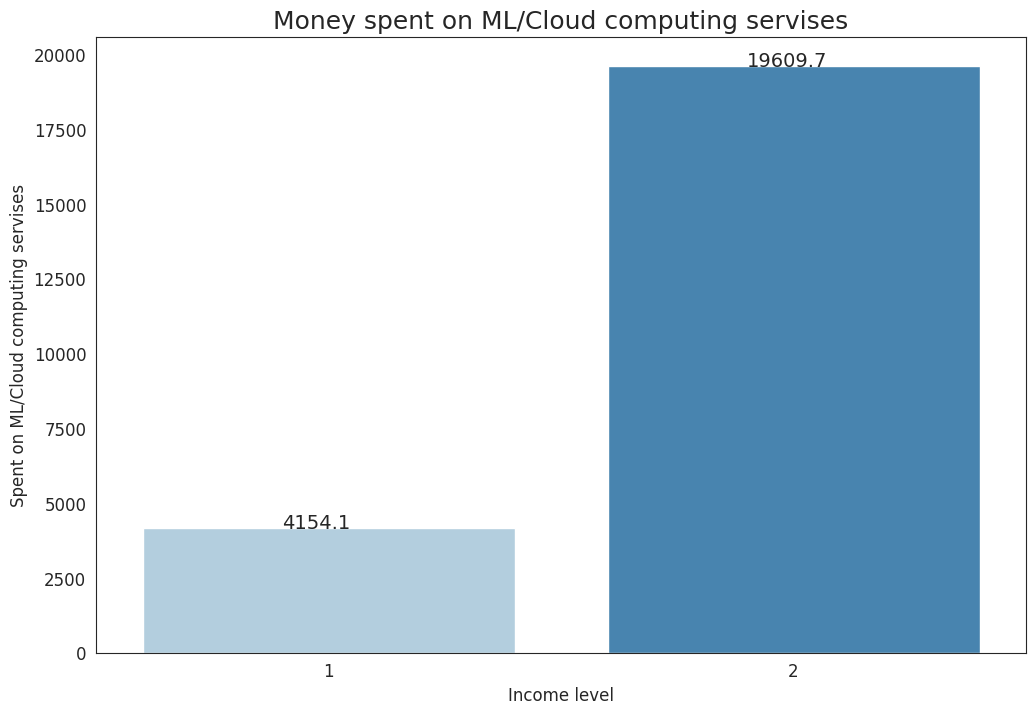

In [179]:
plt.figure(figsize =(12,8))
sns.barplot(data = spent_cl, x =spent_cl['Income level'].astype(str),y = 'Spent on ML/Cloud computing servises',palette =palette )
for i, v in enumerate(spent_cl['Spent on ML/Cloud computing servises']):
    plt.text(i-0.1, v+0.1, f'{v:.1f}', fontsize=14)
plt.title('Money spent on ML/Cloud computing servises', fontsize = 18)

Income level 2 spends almost 5 times more than Income level 1.
They have experience in selecting and optimizing cloud computing services  
 => increase efficiency and reduce costs for the company.

In [180]:
tpu_count= round(final_df.groupby('Income level')['Approximately how many times have you used a TPU (tensor processing unit)?'].mean().reset_index(),1)
tpu_count.columns = ['Income level','Number of times used TPU (tensor processing unit)']
tpu_count

,Income level,Number of times used TPU (tensor processing unit)
0,1,2.5
1,2,3.3


Text(0.5, 1.0, 'Number of times used TPU (tensor processing unit)')

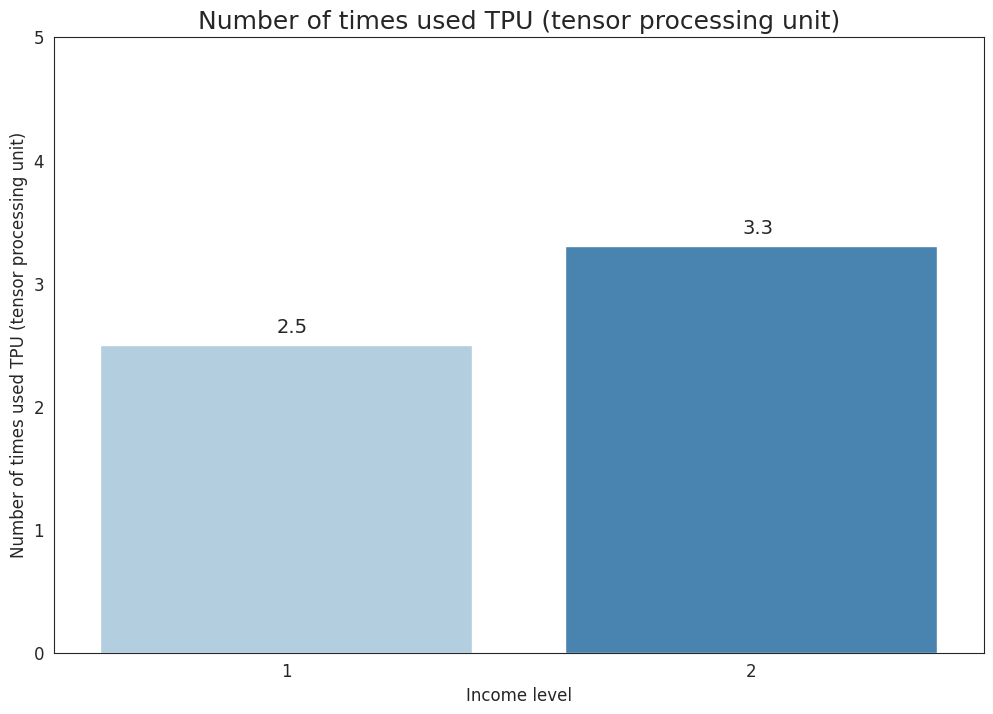

In [181]:
plt.figure(figsize =(12,8))
sns.barplot(data = tpu_count, x =tpu_count['Income level'].astype(str),y = 'Number of times used TPU (tensor processing unit)',palette =palette )
for i, v in enumerate(tpu_count['Number of times used TPU (tensor processing unit)']):
    plt.text(i-0.02, v+0.1, f'{v:.1f}', fontsize=14)
plt.ylim(0,5)
plt.title('Number of times used TPU (tensor processing unit)', fontsize = 18)

TPU is a useful tool used by Data Scientists to speed up the processing of Machine learning services.


#### Where can I learn ML?

In [182]:
lear_plat = calculate_rate(final_df,'Income level',final_df.columns[243:253])
lear_plat.columns = lear_plat.columns.str.replace(r"DS learning platforms - ", "", regex=True)
lear_plat =lear_plat.T.sort_values(2,ascending = False).reset_index()
lear_plat

Income level,index,1,2
0,Coursera,39.8,56.0
1,Udemy,35.1,32.4
2,Kaggle Learn Courses,36.3,31.3
3,University Courses (resulting in a university ...,20.4,26.9
4,LinkedIn Learning,15.7,14.8
5,edX,10.5,14.3
6,DataCamp,18.9,14.3
7,Udacity,9.0,13.2
8,Fast.ai,4.7,10.4
9,"Cloud-certification programs (direct from AWS,...",10.7,9.3


In [183]:
share_plat = calculate_rate(final_df,'Income level',final_df.columns[233:241])
share_plat.columns = share_plat.columns.str.replace(r"Where do you publicly share your data analysis or machine learning applications\? \(Select all that apply\) - Selected Choice - ", "", regex=True)
share_plat = share_plat.T.sort_values(2,ascending = False).reset_index()
share_plat

Income level,index,1,2
0,GitHub,36.1,39.0
1,Kaggle,26.9,25.8
2,Colab,17.0,17.6
3,Personal blog,6.2,7.7
4,Streamlit,4.3,7.1
5,Shiny,2.2,4.4
6,Plotly Dash,2.2,3.8
7,NBViewer,1.3,1.1


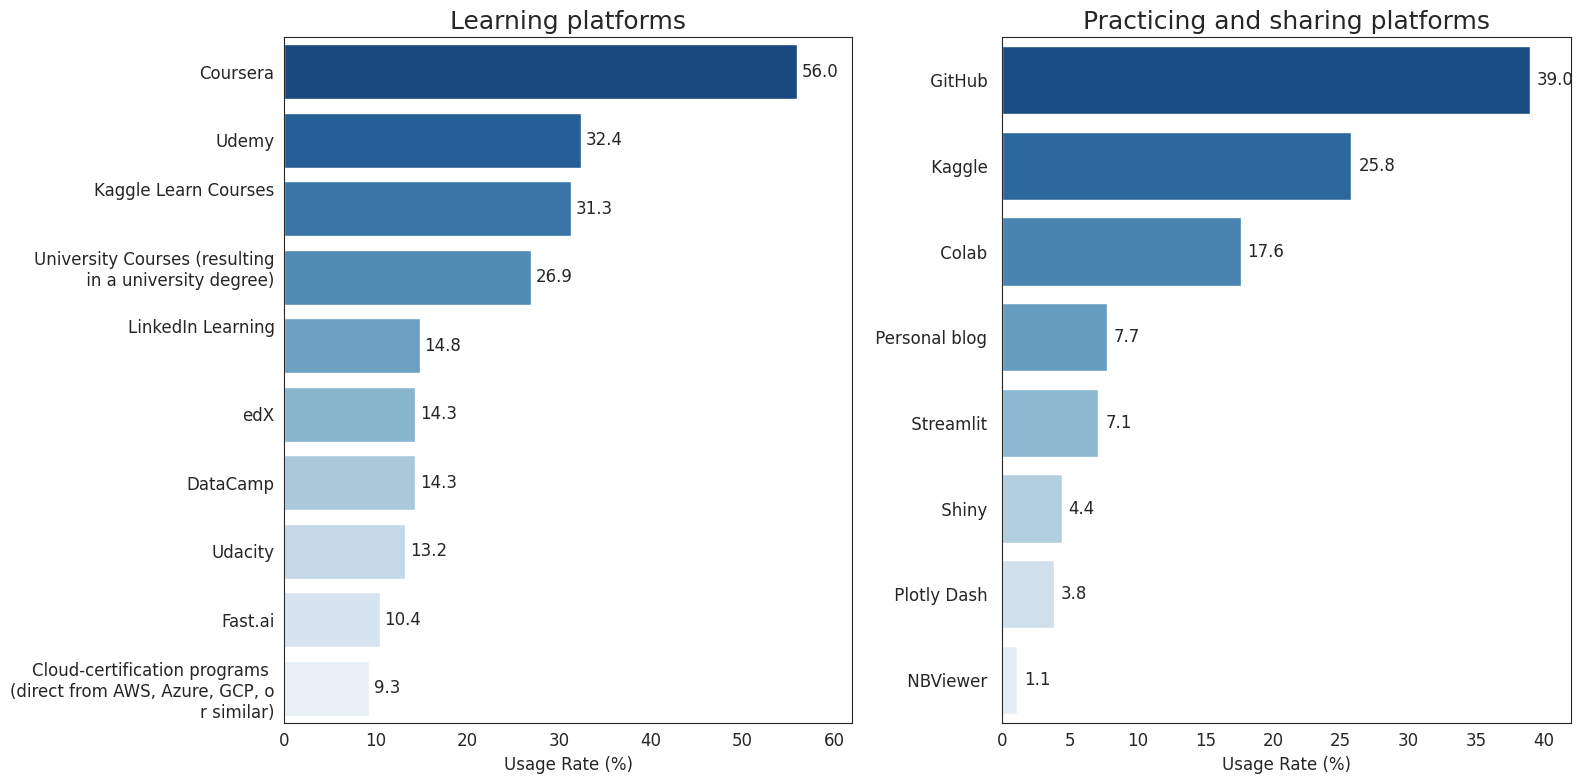

In [184]:
fig, ax = plt.subplots(1,2,figsize=(16,8))
palette1 = sns.color_palette("Blues", n_colors=10)[::-1]
palette2 = sns.color_palette("Blues", n_colors=8)[::-1]
sns.barplot(data=lear_plat,
            y="index",
            x=2 ,
            palette=palette1,
            ax = ax[0])
for i,v in enumerate(lear_plat[2].values):
  ax[0].text(v + 0.5, i, str(v), ha='left', va='center')
ax[0].set_xlabel('Usage Rate (%)')
ax[0].set_ylabel('')
ax[0].set_xlim(0,62)
yticklabels = [f'{label[:29]}\n{label[29:60]}\n{label[60:]}' if len(label) > 10 else label for label in lear_plat['index']]
ax[0].set_yticklabels(yticklabels)
ax[0].set_title('Learning platforms', fontsize = 18)


sns.barplot(data=share_plat,
            y="index",
            x=2,
            palette=palette2,
            ax = ax[1])
for i,v in enumerate(share_plat[2].values):
  ax[1].text(v + 0.5, i, str(v), ha='left', va='center')

ax[1].set_xlabel('Usage Rate (%)')
ax[1].set_xlim(0,42)
ax[1].set_ylabel('')
ax[1].set_title('Practicing and sharing platforms', fontsize = 18)
plt.tight_layout()
plt.show()

Top 3 Learning platforms : Coursera, Udemy, Kaggle Learn Courses.

Top 3  Sharing ML platforms: GitHub, Kaggle, Colab.

#### Conclusion

To increase income, inexperienced Data Scientists need to improve their skills to do more Machine Learning activities.

Priority skills :
  - ML framework: Xgboost, LightGBM, and CatBoost.
  - ML algorithms Gradient-boosting, NLP techniques.
  - Managing ML models: Amazon SageMaker, Databricks, Azure Machine Learning Studio
  - Monitoring ML models: TensorBoard, MLflow, Weights& Biases.
  - Cloud computing: Amazon Web Services, Microsoft Azure, Google Cloud Platform.

Learning & Sharing platforms: CourseraUdemy, Kaggle, Learn Courses, GitHub, Colab,…

## Model Predict Income

#### Predict dataset

In [185]:
pre_df = final_df.iloc[:,-1:]
pre_df

,Income level
8,2
95,1
142,1
154,1
230,1
...,...
25892,1
25904,1
25922,2
25931,1


In [186]:
pre_df = pre_df.copy()
pre_df['Income'] = final_df['Income']
pre_df['Coding Experience'] = final_df['Coding Experience']
pre_df['Spent on ML'] = final_df['Approximately how much money have you (or your team) spent on machine learning and/or cloud computing services at home (or at work) in the past 5 years (approximate $USD)?']
pre_df['Used TPU'] = final_df['Approximately how many times have you used a TPU (tensor processing unit)?']
pre_df['ML framework'] = count_act(final_df[final_df.columns[78:81]])
pre_df['ML algo'] = count_act(final_df[final_df.columns[[92,95,99]]])
pre_df['ML platforms'] = count_act(final_df[final_df.columns[[155,156,159]]])
pre_df['ML monitor'] = count_act(final_df[final_df.columns[[225,230]]])

In [187]:
pre_df.dropna(inplace=True)

In [188]:
pre_df.isnull().sum()

Income level         0
Income               0
Coding Experience    0
Spent on ML          0
Used TPU             0
ML framework         0
ML algo              0
ML platforms         0
ML monitor           0
dtype: int64

In [189]:
pre_df

,Income level,Income,Coding Experience,Spent on ML,Used TPU,ML framework,ML algo,ML platforms,ML monitor
8,2,17500.0,7.5,50.0,3.5,0,1,1,1
95,1,500.0,0.5,0.0,0.0,0,1,0,0
142,1,500.0,0.5,0.0,1.0,1,0,0,0
154,1,500.0,4.0,5000.0,0.0,0,0,0,0
230,1,12500.0,0.5,50.0,3.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...
25892,1,500.0,0.5,0.0,1.0,0,0,0,0
25904,1,8750.0,2.0,50000.0,15.0,0,1,1,0
25922,2,22500.0,4.0,5000.0,15.0,3,1,2,0
25931,1,12500.0,15.0,50000.0,0.0,3,2,0,1


In [190]:
X = pre_df.drop(['Income level','Income'],axis = 1)
y = pre_df['Income level']

In [191]:
y = y.replace({1: 0, 2: 1})

In [192]:
X

,Coding Experience,Spent on ML,Used TPU,ML framework,ML algo,ML platforms,ML monitor
8,7.5,50.0,3.5,0,1,1,1
95,0.5,0.0,0.0,0,1,0,0
142,0.5,0.0,1.0,1,0,0,0
154,4.0,5000.0,0.0,0,0,0,0
230,0.5,50.0,3.5,0,1,0,0
...,...,...,...,...,...,...,...
25892,0.5,0.0,1.0,0,0,0,0
25904,2.0,50000.0,15.0,0,1,1,0
25922,4.0,5000.0,15.0,3,1,2,0
25931,15.0,50000.0,0.0,3,2,0,1


#### Feature Scaling

In [193]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [194]:
num_features = pre_df.columns[5:].to_list()
cat_features = pre_df.columns[2:5].to_list()

In [195]:
from sklearn.preprocessing import MinMaxScaler

# Khởi tạo scaler MinMax
scaler = MinMaxScaler()

# Áp dụng phép chuẩn hóa Min-Max cho từng cột
X_train_num_scaled = scaler.fit_transform(X_train[num_features])
X_test_num_scaled = scaler.transform(X_test[num_features])

In [196]:
from sklearn.preprocessing import OneHotEncoder

In [197]:
encoder = OneHotEncoder(handle_unknown="ignore")

In [198]:
X_train_cat_1hot = encoder.fit_transform(X_train[cat_features])

In [199]:
X_train_cat_1hot = X_train_cat_1hot.toarray()

In [200]:
X_test_cat_1hot = encoder.transform(X_test[cat_features])
X_test_cat_1hot = X_test_cat_1hot.toarray()

In [201]:
X_train_final = np.concatenate(
    [X_train_num_scaled, X_train_cat_1hot], axis=1
)

In [202]:
X_test_final = np.concatenate(
    [X_test_num_scaled, X_test_cat_1hot], axis=1
)

#### Model Training

In [203]:
lr = LogisticRegression()
lr.fit(X_train_final, y_train)

LogisticRegression()

In [204]:
y_train_pred = lr.predict(X_train_final)
y_test_pred = lr.predict(X_test_final)

#### Predict results

##### Confusion matrix & Classification Report

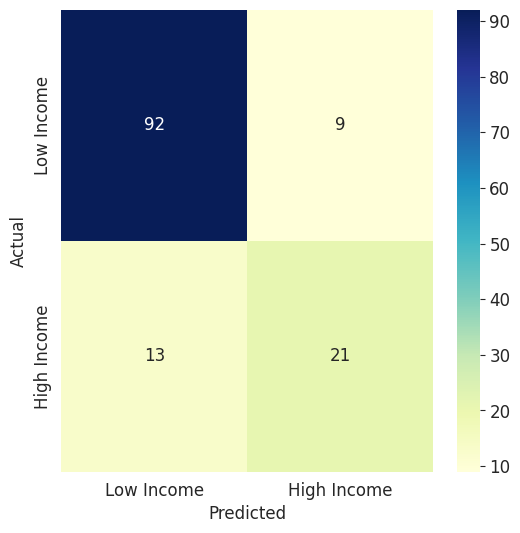

In [205]:
from sklearn.metrics import classification_report, confusion_matrix
data = confusion_matrix(y_test, y_test_pred)
df_cm = pd.DataFrame(
    data,
    columns=['Low Income','High Income'],
    index=['Low Income','High Income'],
)
df_cm.index.name = "Actual"
df_cm.columns.name = "Predicted"
plt.figure(figsize=(6, 6))
sns.heatmap(df_cm, cmap="YlGnBu", annot=True, fmt="g");

In [206]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89       101
           1       0.70      0.62      0.66        34

    accuracy                           0.84       135
   macro avg       0.79      0.76      0.77       135
weighted avg       0.83      0.84      0.83       135



#### Adjusting the threshold level

In [207]:
y_pred_prob = lr.predict_proba(X_test_final)[0:10]

y_pred_prob

array([[0.94010322, 0.05989678],
       [0.63054192, 0.36945808],
       [0.07361776, 0.92638224],
       [0.94059127, 0.05940873],
       [0.93822413, 0.06177587],
       [0.62513963, 0.37486037],
       [0.66554787, 0.33445213],
       [0.80038104, 0.19961896],
       [0.83580746, 0.16419254],
       [0.84892108, 0.15107892]])

In [208]:
y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - Low Income (0)', 'Prob of - High Income (1)'])

y_pred_prob_df

,Prob of - Low Income (0),Prob of - High Income (1)
0,0.940103,0.059897
1,0.630542,0.369458
2,0.073618,0.926382
3,0.940591,0.059409
4,0.938224,0.061776
5,0.625140,0.374860
6,0.665548,0.334452
7,0.800381,0.199619
8,0.835807,0.164193
9,0.848921,0.151079


In [209]:
from sklearn.preprocessing import binarize as sk_binarize

for i in range(1, 10):
    cm1 = 0
    y_pred1 = lr.predict_proba(X_test_final)[:, 1]
    y_pred1 = y_pred1.reshape(-1, 1)
    y_pred2 = (y_pred1 >= i/10).astype(int)
    cm1 = confusion_matrix(y_test, y_pred2)

    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',

            'with',cm1[0,0]+cm1[1,1],'correct predictions, ', '\n\n',

            cm1[0,1],'Type I errors( False Negatives), ','\n\n',

            cm1[1,0],'Type II errors( False Positives), ','\n\n',

           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',

           'Sensitivity: ',cm1[1,1]/(float(cm1[1,1]+cm1[1,0])), '\n\n',

           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,1])),'\n\n',

            '====================================================', '\n\n')

With 0.1 threshold the Confusion Matrix is  

 [[25 76]
 [ 2 32]] 

 with 57 correct predictions,  

 76 Type I errors( False Negatives),  

 2 Type II errors( False Positives),  

 Accuracy score:  0.4222222222222222 

 Sensitivity:  0.9411764705882353 

 Specificity:  0.24752475247524752 



With 0.2 threshold the Confusion Matrix is  

 [[63 38]
 [ 6 28]] 

 with 91 correct predictions,  

 38 Type I errors( False Negatives),  

 6 Type II errors( False Positives),  

 Accuracy score:  0.674074074074074 

 Sensitivity:  0.8235294117647058 

 Specificity:  0.6237623762376238 



With 0.3 threshold the Confusion Matrix is  

 [[81 20]
 [ 8 26]] 

 with 107 correct predictions,  

 20 Type I errors( False Negatives),  

 8 Type II errors( False Positives),  

 Accuracy score:  0.7925925925925926 

 Sensitivity:  0.7647058823529411 

 Specificity:  0.801980198019802 



With 0.4 threshold the Confusion Matrix is  

 [[86 15]
 [10 24]] 

 with 110 correct predictions,  

 15 Type I error

Classification threshold level

The default classification threshold is 0.5.

Type 1 - probability that rain is predicted if probability > 0.5.

Type 0 - probability that no rain is predicted if probability < 0.5.

Threshold is 0.5 also gives the best predict result with accuracy equal to 0.84


#### ROC-AUC

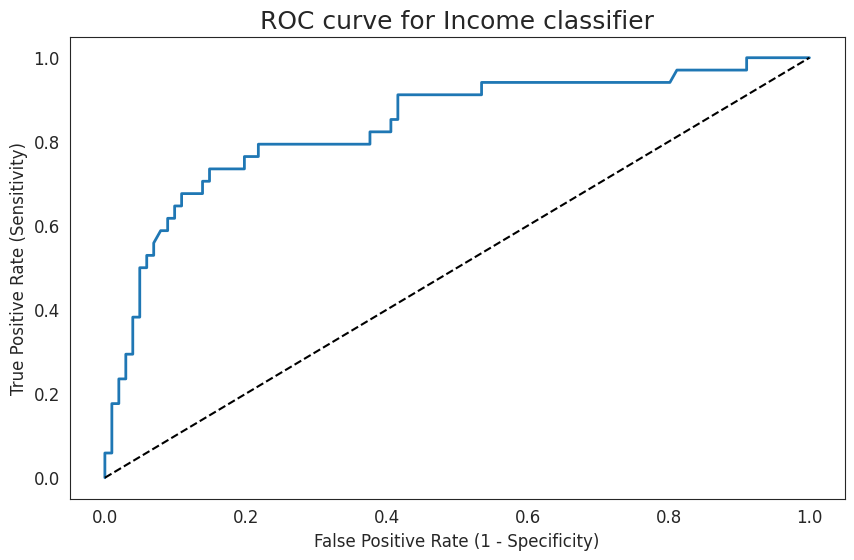

In [210]:
# plot ROC Curve

from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label = 1)

plt.figure(figsize=(10,6))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.rcParams['font.size'] = 12

plt.title('ROC curve for Income classifier',fontsize = 18)

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

In [211]:
# compute ROC AUC

from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred1)

print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8375


In [212]:
# calculate cross-validated ROC AUC
from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(lr, X_test_final, y_test, cv=5, scoring='roc_auc').mean()

print('Cross validated ROC AUC : {:.4f}'.format(Cross_validated_ROC_AUC))

Cross validated ROC AUC : 0.8073


ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance

ROC AUC is a single number summary of classifier performance. The higher the value, the better the classifier.


ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job of predicting the Income level of the Data Scientist

#### k-Fold Cross Validation

In [213]:
# Applying 5-Fold Cross Validation

from sklearn.model_selection import cross_val_score

scores = cross_val_score(lr, X_test_final, y_test, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.74074074 0.81481481 0.77777778 0.81481481 0.88888889]


In [214]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8074


#### Hyperparameter Optimization using GridSearch CV

In [215]:
from sklearn.model_selection import GridSearchCV


parameters = [{'solver': ['liblinear', 'saga']}, {'penalty': ['l2'], 'C': [0.1, 1, 10]}]

grid_search = GridSearchCV(estimator = lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train_final, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'solver': ['liblinear', 'saga']},
                         {'C': [0.1, 1, 10], 'penalty': ['l2']}],
             scoring='accuracy')

In [216]:
# examine the best model

# best score achieved during the GridSearchCV
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

# print parameters that give the best results
print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

# print estimator that was chosen by the GridSearch
print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.7981


Parameters that give the best results : 

 {'solver': 'liblinear'}


Estimator that was chosen by the search : 

 LogisticRegression(solver='liblinear')


In [217]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test_final, y_test)))

GridSearch CV score on test set: 0.8370


#### Results and conclusion

The logistic regression model accuracy score is 0.8370. So, the model does a very good job of predicting Income level of Data Scientist

Increasing the threshold level results in increased accuracy.

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job of predicting Income level of Data Scientist

The accuracy of the original model test and GridSearch CV are both 0.8370 => No improvement.

## Recommend skill to learn

#### Create function to recommend skills

In [218]:
def find_similar_index(df, target_index):
    target_row = df.iloc[target_index]

    filtered_df = df[df['Income level'] == 2]

    similarities = []
    for _, row in filtered_df.iterrows():
        similarity = np.linalg.norm(row.values[2:] - target_row.values[2:])
        similarities.append(similarity)

    most_similar_index = similarities.index(min(similarities))
    most_similar_row = filtered_df.iloc[most_similar_index]

    improvements = np.where(most_similar_row.values > target_row.values, most_similar_row.values, target_row.values)

    columns = df.columns[2:]

    improvements_df = pd.DataFrame([target_row.values[2:], improvements[2:]], index=['Initial', 'Recommend'], columns=columns)

    return improvements_df


#### Example

In [219]:
improvements = find_similar_index(pre_df,16)
improvements

,Coding Experience,Spent on ML,Used TPU,ML framework,ML algo,ML platforms,ML monitor
Initial,2.0,0.0,1.0,0.0,0.0,0.0,0.0
Recommend,2.0,0.0,1.0,0.0,1.0,0.0,0.0


In [220]:
# # Mount to Google Sheets
# from google.colab import auth
# auth.authenticate_user()

# # Import neccessary libraries -- Đi học syntax
# import gspread
# from google.auth import default
# creds, _ = default()
# from gspread_dataframe import set_with_dataframe

# # Authorize Google Sheets API
# gc = gspread.authorize(creds)

In [221]:
# # Create a new Google Spreadsheets
# sh = gc.create('Data Science parameter')

In [222]:
# def export_data_to_new_sheet(gsheet_key, worksheet_name, data):

#     sh = gc.open_by_key(gsheet_key)

#     # To create a new worksheet with 1000 rows and 26 columns
#     worksheet = sh.add_worksheet(worksheet_name, 1000, 26)

#     # For writing to an existing worksheet
#     # worksheet = sh.get_worksheet(0) # --> to get the first worksheet

#     set_with_dataframe(worksheet, data)

In [223]:
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','fw_rate', fw_rate)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','count_fw', count_fw)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','learn_platform', learn_platform)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','algo_ml', algo_ml)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','count_al', count_al)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','cv_ml', cv_ml)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','count_cv', count_cv)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','nlp_ml', nlp_ml)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','count_nlp', count_nlp)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','cl_rate', cl_rate)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','count_cl', count_cl)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','spent_cl', spent_cl)
# export_data_to_new_sheet('1H5dUeH7PuddigBDYGE2CFif9qsBCARLFruEWdMK5-lk','tpu_count', tpu_count)